<a href="https://colab.research.google.com/github/juurie/Projects/blob/main/code(The_better%2C_Safe_life).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy 1.19.5
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1


In [ ]:
excel1=pd.read_excel('경진대회용데이터.xlsx')

In [ ]:
data1=excel1.set_index("id")
data1.tail()

,시도명,시군구명,읍면동명,행정리명,조사가구번호,q1_1,q1_2,q2_1_1,q2_1_2,q2_2_1,...,aq8_1_2etc,aq9_1,aq9_1_1,aq9_1_1etc,aq10_1,aq11_1,re1,q1_1re,age,age2
id,,,,,,,,,,,,,,,,,,,,,
17766,제주특별자치도,서귀포시,예래동,예래동03,7,밀감,2-36,2,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,제주,6,a4,제주a4
17767,제주특별자치도,서귀포시,예래동,예래동03,8,밀감,2-36,2,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,제주,6,a3,제주a3
17768,제주특별자치도,서귀포시,예래동,예래동03,9,밀감,2-36,2,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,제주,6,a2,제주a2
17769,제주특별자치도,서귀포시,예래동,예래동03,9,밀감,2-36,2,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,제주,6,a2,제주a2
17770,제주특별자치도,서귀포시,예래동,예래동03,10,밀감,2-36,2,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,제주,6,a4,제주a4


# 분석 배경

주제 선정 이유

2021 농업인 손상 조사는 농업인을 대상으로 농업 중 손상 여부에 대한 조사이다.  조사 내용은 농업 중 손상여부, 치료 여부, 손상 상황, 치료비 등이다. 초기 데이터 수집을 위한 조사 과정에서 농업인의 고충과 현실에 대하여 직접적으로 들을 수 있었기 때문에 주제 선정과 결과 도출에 많은 도움이 되었다.

예로부터 농업은 우리 사회와 뗄래야 뗄 수 없는 관계를 유지하고 있다. 농업 생활은 우리 경제 환경과 밀접한 관계를 가지고 있고 농업의 불안정은 우리 사회에 큰 영향을 끼친다. 하지만 농업이 매우 중요한것에 비해 농업인에 대한 배려는 잘 이루어지지 않고있다. 농업인들이 자신의 생업에 집중할 수 있는 지원과 보다 안전한 삶을 누릴 수 있는 환경이 이루어져야 한다고 생각한다. 그래서 우리는 농업인의 고충에 도움을 줄 수 있는 방향으로 통계를 내고 분석하기로 했다. 우선 농업 손상률에서 가장 높은 비율을 차지한다고 생각한 농기계 사고에 대해 분석을 하였다. 또, 농기계 사고를 줄이기 위해서는 안전장비를 잘 착용하는 것이 해결방안이라 생각하여 농업인이 잘 착용하는지에 대해 분석하고, 농기계를 사용한다면 농기계의 주 이동경로의 도로상황 역시 고려해야할 요소라고 생각하였다. 그리고 조사 과정에서 많이 들었던 농업인이 전반적으로 호소했던 불만에 대해 생각해 보며 비료에 대한 분석도 실행하였다.
 
이처럼 농업인들의 현실적인 고충과 직접 조사를 진행하면서 든 생각을 바탕으로 농업인들의 안전과현실에 도움이 되는 분석을 통해 다양한 해결 방안을 제안하기 위하여 다음 분석을 진행하였다.

# 농사 현황

## 지역별 농사 현황

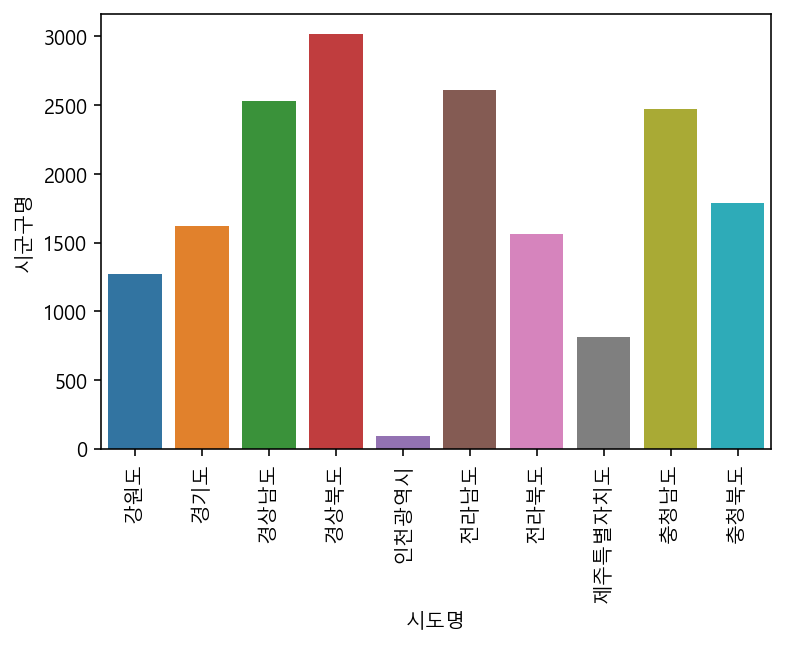

In [ ]:
c1=data1.groupby('시도명').count()
ax=sns.barplot(data=c1,x=c1.index,y='시군구명')
_=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<ipython-input-5-a74c77ae5107>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gang1.list=[gang1_y1['시도명'],gang1_y2['시도명'],gang1_y3['시도명'],gang1_y4['시도명'],gang1_y5['시도명'],gang1_y6['시도명']]


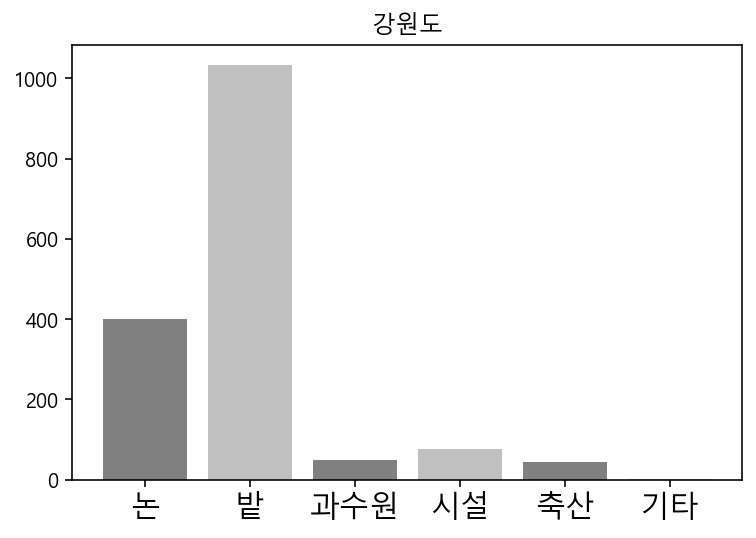

In [ ]:
gang1=data1.loc[data1['시도명']=='강원도']
gang1_y1=gang1.loc[gang1['q2_1_1'] == 1].count()
gang1_y2=gang1.loc[gang1['q2_2_1'] == 1].count()
gang1_y3=gang1.loc[gang1['q2_3_1'] == 1].count()
gang1_y4=gang1.loc[gang1['q2_4_1'] == 1].count()
gang1_y5=gang1.loc[gang1['q2_5_1'] == 1].count()
gang1_y6=gang1.loc[gang1['q2_6_1'] == 1].count()
gang1.list=[gang1_y1['시도명'],gang1_y2['시도명'],gang1_y3['시도명'],gang1_y4['시도명'],gang1_y5['시도명'],gang1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],gang1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("강원도")

<ipython-input-6-8c13efb1c8fd>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gn1.list=[gn1_y1['시도명'],gn1_y2['시도명'],gn1_y3['시도명'],gn1_y4['시도명'],gn1_y5['시도명'],gn1_y6['시도명']]


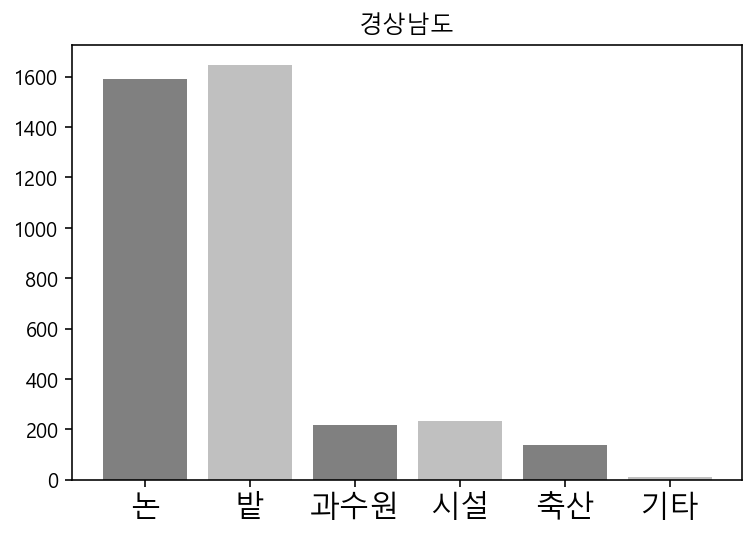

In [ ]:
gn1=data1.loc[data1['시도명']=='경상남도']
gn1_y1=gn1.loc[gn1['q2_1_1'] == 1].count()
gn1_y2=gn1.loc[gn1['q2_2_1'] == 1].count()
gn1_y3=gn1.loc[gn1['q2_3_1'] == 1].count()
gn1_y4=gn1.loc[gn1['q2_4_1'] == 1].count()
gn1_y5=gn1.loc[gn1['q2_5_1'] == 1].count()
gn1_y6=gn1.loc[gn1['q2_6_1'] == 1].count()
gn1.list=[gn1_y1['시도명'],gn1_y2['시도명'],gn1_y3['시도명'],gn1_y4['시도명'],gn1_y5['시도명'],gn1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],gn1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("경상남도")

<ipython-input-7-c046eddcdea2>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gg1.list=[gg1_y1['시도명'],gg1_y2['시도명'],gg1_y3['시도명'],gg1_y4['시도명'],gg1_y5['시도명'],gg1_y6['시도명']]


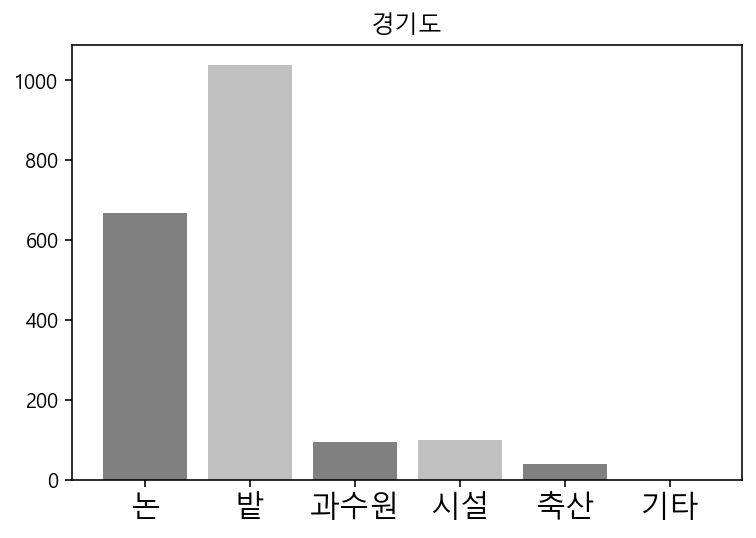

In [ ]:
gg1=data1.loc[data1['시도명']=='경기도']
gg1_y1=gg1.loc[gg1['q2_1_1'] == 1].count()
gg1_y2=gg1.loc[gg1['q2_2_1'] == 1].count()
gg1_y3=gg1.loc[gg1['q2_3_1'] == 1].count()
gg1_y4=gg1.loc[gg1['q2_4_1'] == 1].count()
gg1_y5=gg1.loc[gg1['q2_5_1'] == 1].count()
gg1_y6=gg1.loc[gg1['q2_6_1'] == 1].count()
gg1.list=[gg1_y1['시도명'],gg1_y2['시도명'],gg1_y3['시도명'],gg1_y4['시도명'],gg1_y5['시도명'],gg1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],gg1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("경기도")

<ipython-input-8-8a9951d9efe1>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gb1.list=[gb1_y1['시도명'],gb1_y2['시도명'],gb1_y3['시도명'],gb1_y4['시도명'],gb1_y5['시도명'],gb1_y6['시도명']]


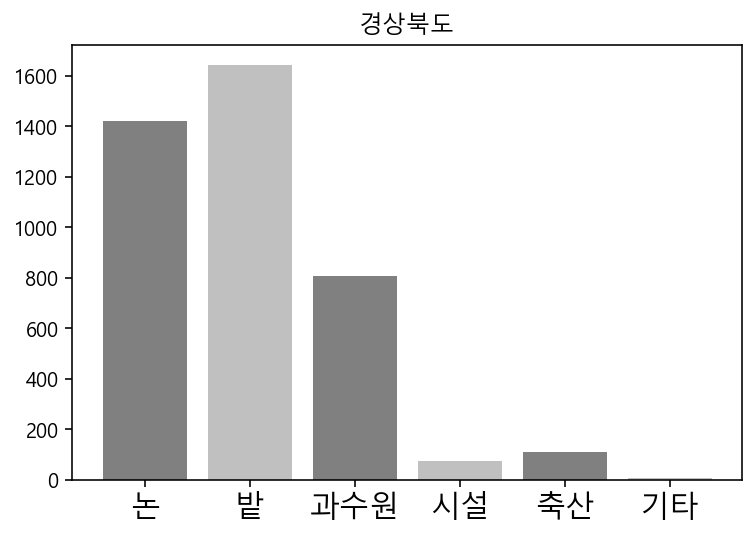

In [ ]:
gb1=data1.loc[data1['시도명']=='경상북도']
gb1_y1=gb1.loc[gb1['q2_1_1'] == 1].count()
gb1_y2=gb1.loc[gb1['q2_2_1'] == 1].count()
gb1_y3=gb1.loc[gb1['q2_3_1'] == 1].count()
gb1_y4=gb1.loc[gb1['q2_4_1'] == 1].count()
gb1_y5=gb1.loc[gb1['q2_5_1'] == 1].count()
gb1_y6=gb1.loc[gb1['q2_6_1'] == 1].count()
gb1.list=[gb1_y1['시도명'],gb1_y2['시도명'],gb1_y3['시도명'],gb1_y4['시도명'],gb1_y5['시도명'],gb1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],gb1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("경상북도")

<ipython-input-9-e1b2ad2ae846>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ic1.list=[ic1_y1['시도명'],ic1_y2['시도명'],ic1_y3['시도명'],ic1_y4['시도명'],ic1_y5['시도명'],ic1_y6['시도명']]


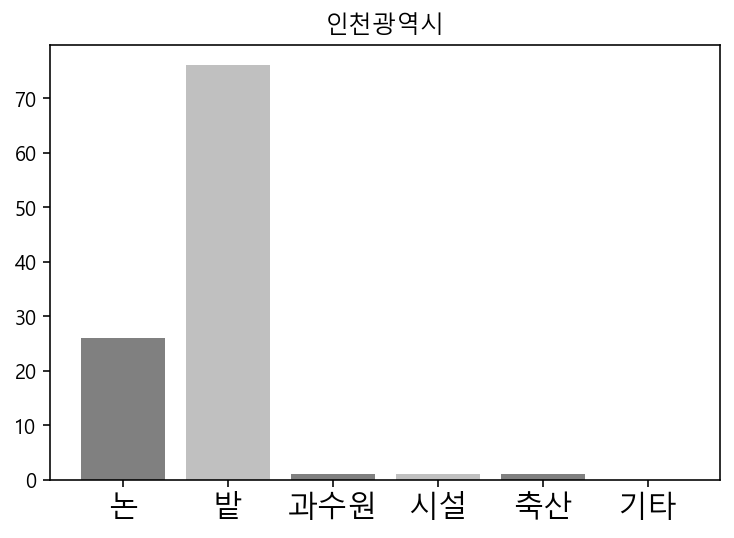

In [ ]:
ic1=data1.loc[data1['시도명']=='인천광역시']
ic1_y1=ic1.loc[ic1['q2_1_1'] == 1].count()
ic1_y2=ic1.loc[ic1['q2_2_1'] == 1].count()
ic1_y3=ic1.loc[ic1['q2_3_1'] == 1].count()
ic1_y4=ic1.loc[ic1['q2_4_1'] == 1].count()
ic1_y5=ic1.loc[ic1['q2_5_1'] == 1].count()
ic1_y6=ic1.loc[ic1['q2_6_1'] == 1].count()
ic1.list=[ic1_y1['시도명'],ic1_y2['시도명'],ic1_y3['시도명'],ic1_y4['시도명'],ic1_y5['시도명'],ic1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']
explode = [0.05, 0.05, 0.05, 0.05]

_=plt.bar([1,2,3,4,5,6],ic1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("인천광역시")

<ipython-input-10-815f4ef3c393>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  jb1.list=[jb1_y1['시도명'],jb1_y2['시도명'],jb1_y3['시도명'],jb1_y4['시도명'],jb1_y5['시도명'],jb1_y6['시도명']]


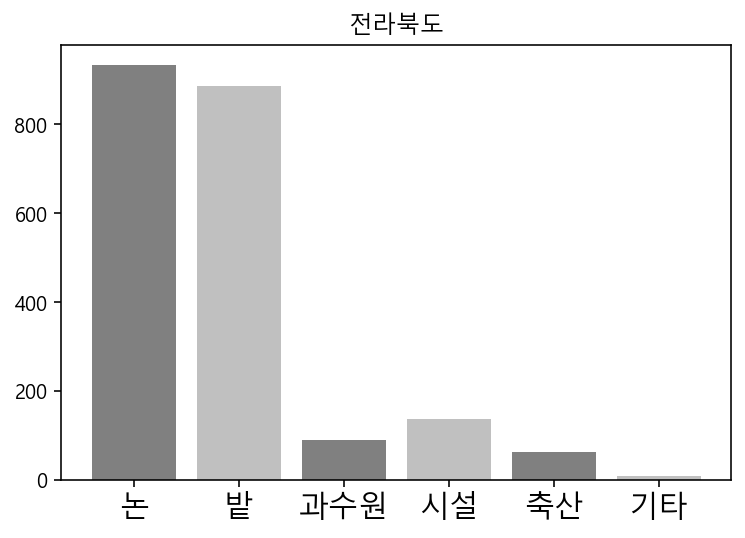

In [ ]:
jb1=data1.loc[data1['시도명']=='전라북도']
jb1_y1=jb1.loc[jb1['q2_1_1'] == 1].count()
jb1_y2=jb1.loc[jb1['q2_2_1'] == 1].count()
jb1_y3=jb1.loc[jb1['q2_3_1'] == 1].count()
jb1_y4=jb1.loc[jb1['q2_4_1'] == 1].count()
jb1_y5=jb1.loc[jb1['q2_5_1'] == 1].count()
jb1_y6=jb1.loc[jb1['q2_6_1'] == 1].count()
jb1.list=[jb1_y1['시도명'],jb1_y2['시도명'],jb1_y3['시도명'],jb1_y4['시도명'],jb1_y5['시도명'],jb1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],jb1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("전라북도")

<ipython-input-11-903af5ddf510>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  jn1.list=[jn1_y1['시도명'],jn1_y2['시도명'],jn1_y3['시도명'],jn1_y4['시도명'],jn1_y5['시도명'],jn1_y6['시도명']]


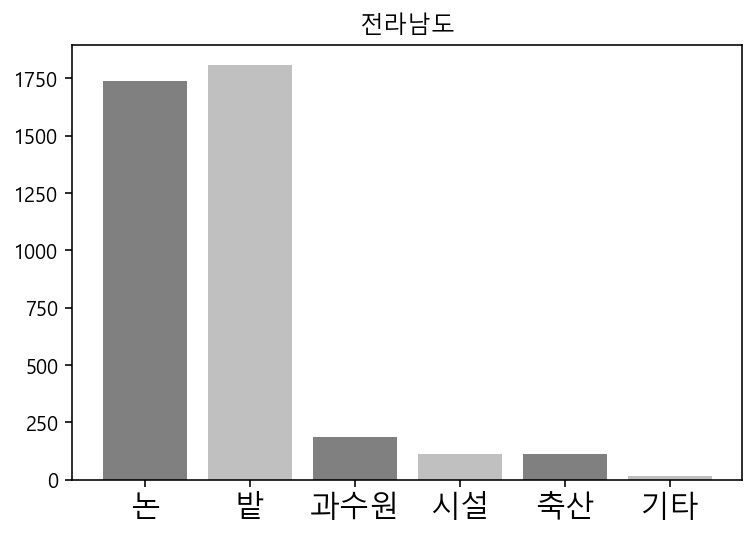

In [ ]:
jn1=data1.loc[data1['시도명']=='전라남도']
jn1_y1=jn1.loc[jn1['q2_1_1'] == 1].count()
jn1_y2=jn1.loc[jn1['q2_2_1'] == 1].count()
jn1_y3=jn1.loc[jn1['q2_3_1'] == 1].count()
jn1_y4=jn1.loc[jn1['q2_4_1'] == 1].count()
jn1_y5=jn1.loc[jn1['q2_5_1'] == 1].count()
jn1_y6=jn1.loc[jn1['q2_6_1'] == 1].count()
jn1.list=[jn1_y1['시도명'],jn1_y2['시도명'],jn1_y3['시도명'],jn1_y4['시도명'],jn1_y5['시도명'],jn1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],jn1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("전라남도")

<ipython-input-12-792e0b4ece79>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  jj1.list=[jj1_y1['시도명'],jj1_y2['시도명'],jj1_y3['시도명'],jj1_y4['시도명'],jj1_y5['시도명'],jj1_y6['시도명']]


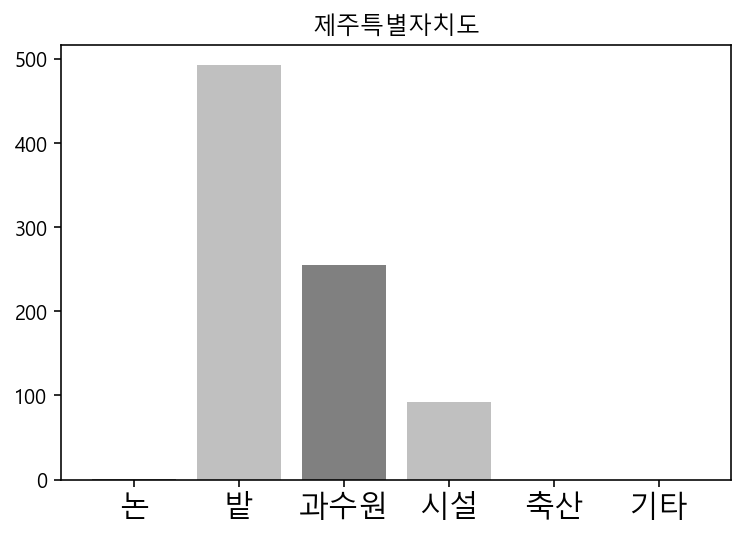

In [ ]:
jj1=data1.loc[data1['시도명']=='제주특별자치도']
jj1_y1=jj1.loc[jj1['q2_1_1'] == 1].count()
jj1_y2=jj1.loc[jj1['q2_2_1'] == 1].count()
jj1_y3=jj1.loc[jj1['q2_3_1'] == 1].count()
jj1_y4=jj1.loc[jj1['q2_4_1'] == 1].count()
jj1_y5=jj1.loc[jj1['q2_5_1'] == 1].count()
jj1_y6=jj1.loc[jj1['q2_6_1'] == 1].count()
jj1.list=[jj1_y1['시도명'],jj1_y2['시도명'],jj1_y3['시도명'],jj1_y4['시도명'],jj1_y5['시도명'],jj1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],jj1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("제주특별자치도")

<ipython-input-13-61999a7234ed>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cn1.list=[cn1_y1['시도명'],cn1_y2['시도명'],cn1_y3['시도명'],cn1_y4['시도명'],cn1_y5['시도명'],cn1_y6['시도명']]


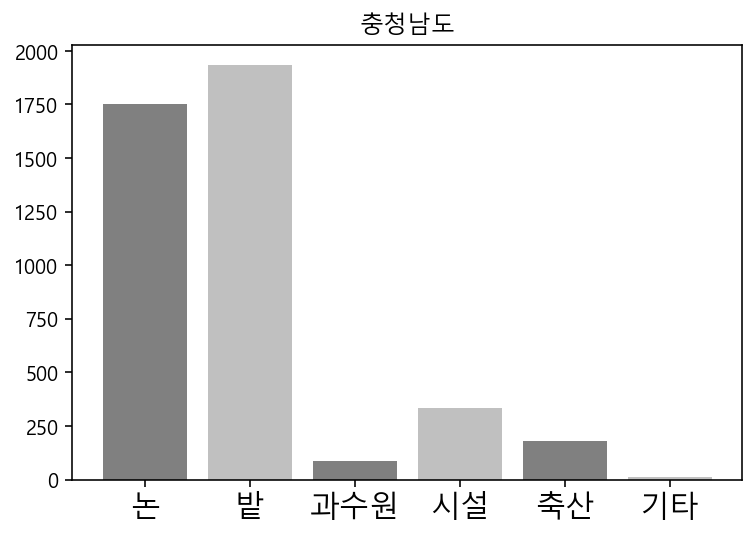

In [ ]:
cn1=data1.loc[data1['시도명']=='충청남도']
cn1_y1=cn1.loc[cn1['q2_1_1'] == 1].count()
cn1_y2=cn1.loc[cn1['q2_2_1'] == 1].count()
cn1_y3=cn1.loc[cn1['q2_3_1'] == 1].count()
cn1_y4=cn1.loc[cn1['q2_4_1'] == 1].count()
cn1_y5=cn1.loc[cn1['q2_5_1'] == 1].count()
cn1_y6=cn1.loc[cn1['q2_6_1'] == 1].count()
cn1.list=[cn1_y1['시도명'],cn1_y2['시도명'],cn1_y3['시도명'],cn1_y4['시도명'],cn1_y5['시도명'],cn1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],cn1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("충청남도")

<ipython-input-14-27d13b715ceb>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cb1.list=[cb1_y1['시도명'],cb1_y2['시도명'],cb1_y3['시도명'],cb1_y4['시도명'],cb1_y5['시도명'],cb1_y6['시도명']]


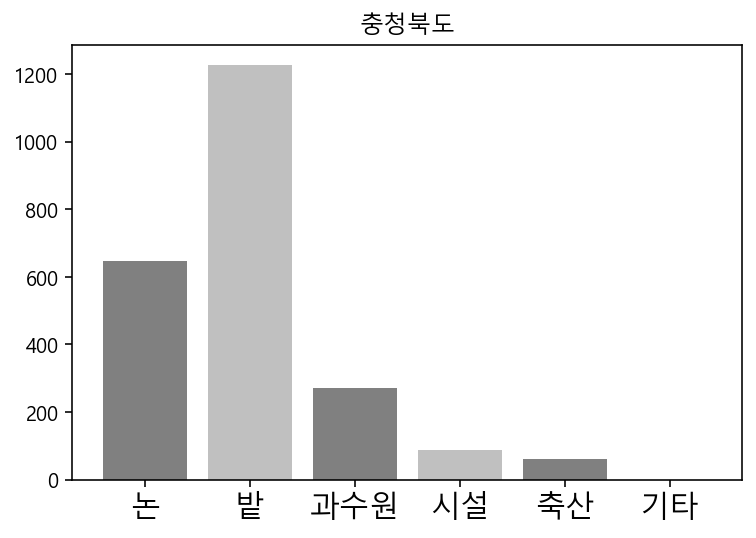

In [ ]:
cb1=data1.loc[data1['시도명']=='충청북도']
cb1_y1=cb1.loc[cb1['q2_1_1'] == 1].count()
cb1_y2=cb1.loc[cb1['q2_2_1'] == 1].count()
cb1_y3=cb1.loc[cb1['q2_3_1'] == 1].count()
cb1_y4=cb1.loc[cb1['q2_4_1'] == 1].count()
cb1_y5=cb1.loc[cb1['q2_5_1'] == 1].count()
cb1_y6=cb1.loc[cb1['q2_6_1'] == 1].count()
cb1.list=[cb1_y1['시도명'],cb1_y2['시도명'],cb1_y3['시도명'],cb1_y4['시도명'],cb1_y5['시도명'],cb1_y6['시도명']]
labels=['논','밭','과수원','시설','축산','기타']

_=plt.bar([1,2,3,4,5,6],cb1.list,color=['gray','silver'])
_=plt.xticks([1,2,3,4,5,6], labels, fontsize=15)
_=plt.title("충청북도")

->다음 분석을 통해 각 지역별로 기후나 환경에 따라 주로 농사를 짓는 종류가 다르다는 것을 알 수 있다.

# 농기계

## 농기계 사용여부

[8944, 8826]

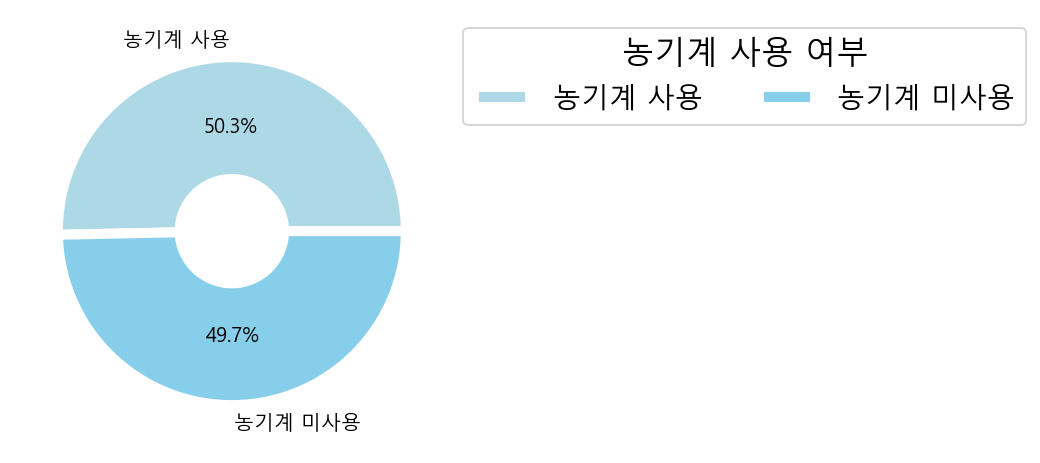

In [ ]:
yes_m=data1.loc[data1['q14']==1].count()
no_m=data1.loc[data1['q14']==2].count()

m_list=[yes_m.loc['시도명'],no_m.loc['시도명']]
m_list
labels=['농기계 사용','농기계 미사용']
ax=plt.pie(m_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='농기계 사용 여부',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.0,1.0),
            title_fontsize=16)

## 농기계에 의한 손상
### 농기계 사용으로 인한 손상 비율

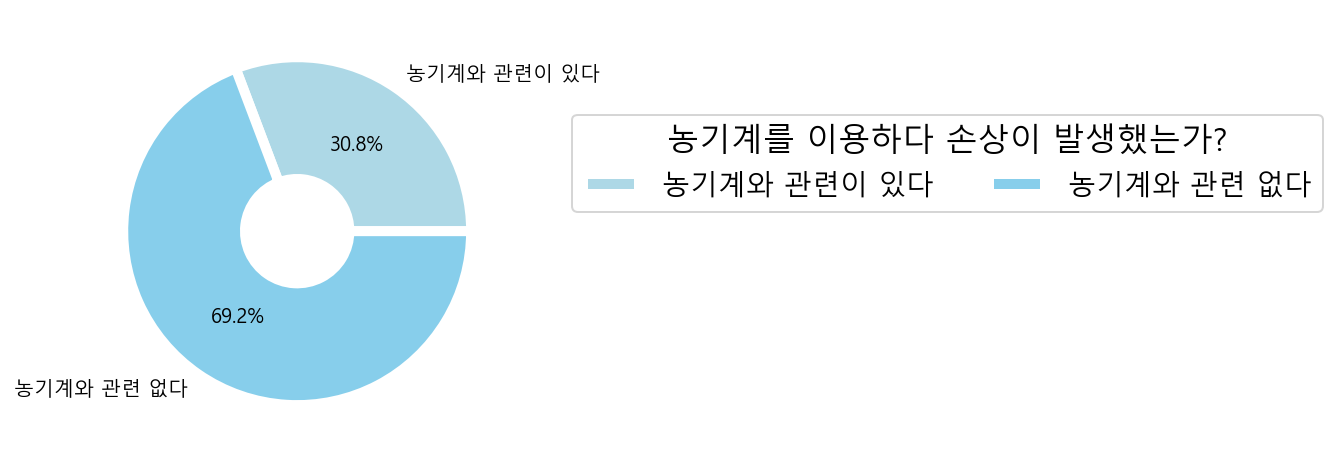

In [ ]:
#손상자 중 농기계 사용으로 인한 손상인가?
a_condition1 = data1['q32'] == 2# 조건식 작성
a1=data1[a_condition1]
accident_person=a1.loc[a1['q32_1']==1]

yes_a_machinery=accident_person.loc[accident_person['aq7_1_1']==1].count()
no_a_machinery=accident_person.loc[accident_person['aq7_1_1']==2].count()

a_machinery_list=[yes_a_machinery.loc['시도명'],no_a_machinery.loc['시도명']]
labels=['농기계와 관련이 있다','농기계와 관련 없다']
ax=plt.pie(a_machinery_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='농기계를 이용하다 손상이 발생했는가?',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

### 손상자 중 과연 농기계를 올바르게 사용하나?
올바르지 않은 농기계 탑승

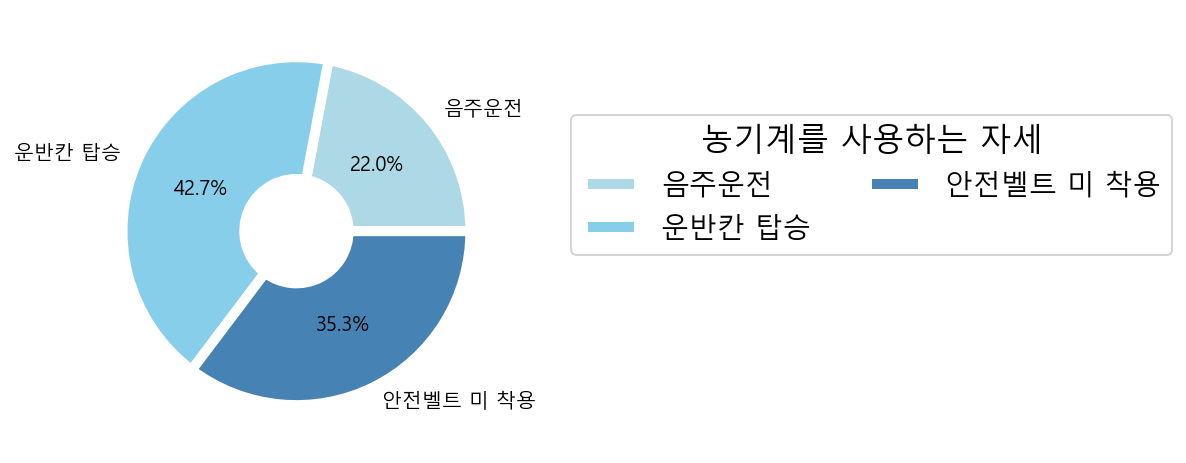

In [ ]:
q3_1=data1.loc[(data1['q27_3']==1)|(data1['q27_3']==2)|(data1['q27_3']==3)].count()
q27_3=q3_1.loc['시도명']
q4_1=data1.loc[(data1['q27_4']==1)|(data1['q27_4']==2)|(data1['q27_4']==3)].count()
q27_4=q4_1.loc['시도명']
q9_1=data1.loc[(data1['q27_9']==1)|(data1['q27_9']==2)|(data1['q27_9']==3)].count()
q27_9=q9_1.loc['시도명']

q27_list=[q27_3,q27_4,q27_9]

_=plt.pie(q27_list,labels=['음주운전','운반칸 탑승','안전벨트 미 착용'],autopct='%.1f%%',
          wedgeprops=wedgeprops,colors=['lightblue','skyblue','steelblue'])
_=plt.legend(title='농기계를 사용하는 자세',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

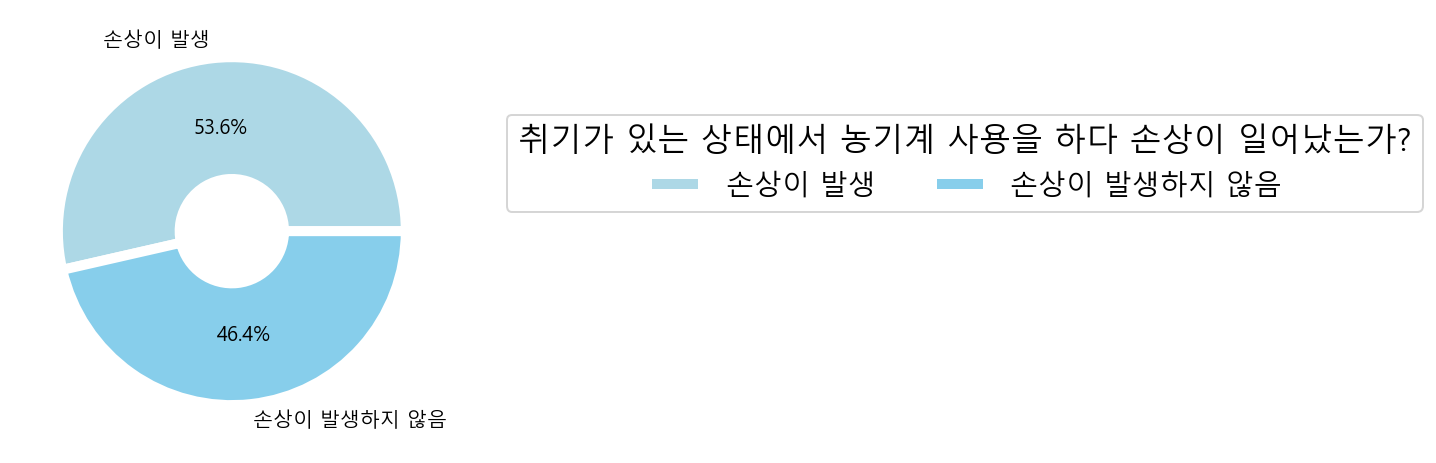

In [ ]:
q3=data1.loc[(data1['q27_3']==1)|(data1['q27_3']==2)|(data1['q27_3']==3)]

q3_q32=q3.loc[q3['q32']==2]
q3_q32_1=q3_q32.loc[q3_q32['q32_1']==1]

q3_yes_a_machinery=q3_q32_1.loc[q3_q32_1['aq7_1_1']==1].count()
q3_no_a_machinery=q3_q32_1.loc[q3_q32_1['aq7_1_1']==2].count()

q3_a_machinery_list=[q3_yes_a_machinery.loc['시도명'],q3_no_a_machinery.loc['시도명']]
labels=['손상이 발생','손상이 발생하지 않음']
ax=plt.pie(q3_a_machinery_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='취기가 있는 상태에서 농기계 사용을 하다 손상이 일어났는가?',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

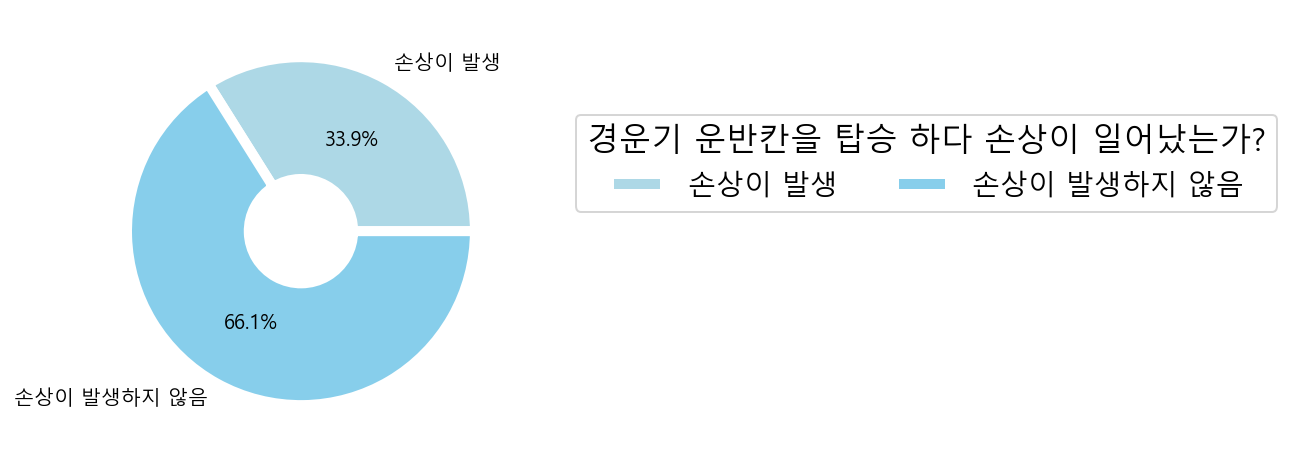

In [ ]:
q4=data1.loc[(data1['q27_4']==1)|(data1['q27_4']==2)|(data1['q27_4']==3)]

q4_q32=q4.loc[q4['q32']==2]
q4_q32_1=q4_q32.loc[q4_q32['q32_1']==1]

q4_yes_a_machinery=q4_q32_1.loc[q4_q32_1['aq7_1_1']==1].count()
q4_no_a_machinery=q4_q32_1.loc[q4_q32_1['aq7_1_1']==2].count()

q4_a_machinery_list=[q4_yes_a_machinery.loc['시도명'],q4_no_a_machinery.loc['시도명']]
labels=['손상이 발생','손상이 발생하지 않음']
ax=plt.pie(q4_a_machinery_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='경운기 운반칸을 탑승 하다 손상이 일어났는가?',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

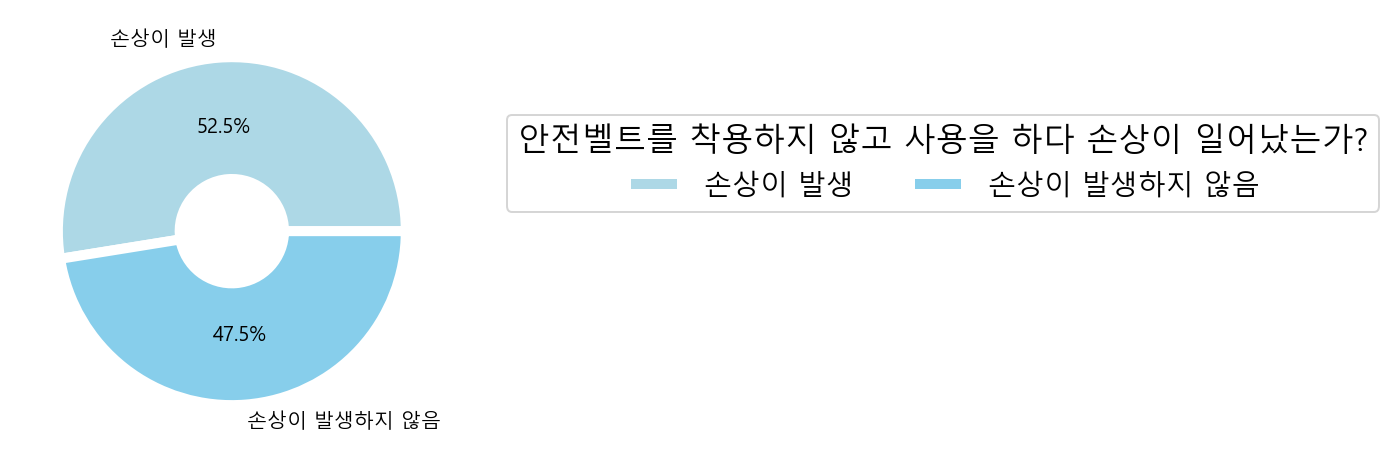

In [ ]:
q9=data1.loc[(data1['q27_9']==1)|(data1['q27_9']==2)|(data1['q27_9']==3)]

q9_q32=q9.loc[q9['q32']==2]
q9_q32_1=q9_q32.loc[q9_q32['q32_1']==1]

q9_yes_a_machinery=q9_q32_1.loc[q9_q32_1['aq7_1_1']==1].count()
q9_no_a_machinery=q9_q32_1.loc[q9_q32_1['aq7_1_1']==2].count()

q9_a_machinery_list=[q9_yes_a_machinery.loc['시도명'],q9_no_a_machinery.loc['시도명']]
labels=['손상이 발생','손상이 발생하지 않음']
ax=plt.pie(q9_a_machinery_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='안전벨트를 착용하지 않고 사용을 하다 손상이 일어났는가?',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

지금까지의 분석을 통해 음주운전, 안전벨트 미착용, 운반칸에 탄 농업인의 비율이 그렇지 않은 농업인의 비율보다 높다는것을 알 수 있다.
그러므로 농업인의 안전을 위해 지속적인 안전교육이 필요하고 농업인 또한 안전한 농기계 사용이 손상률을 줄인다는것을 항상 인지해야 한다.

## 농기계 - 사다리

### 사다리 사용 여부

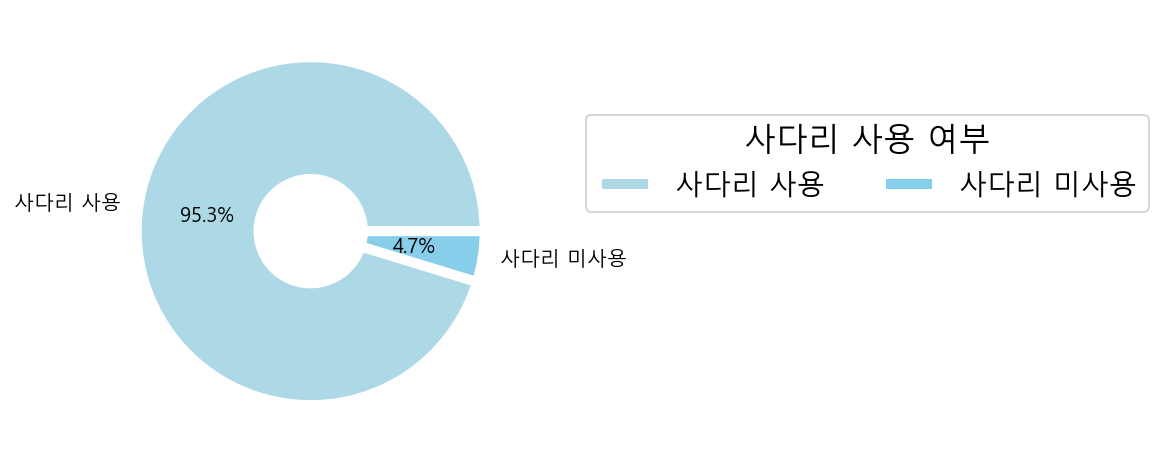

In [ ]:
l_y=0
l_n=0
ladder=data1['q26']
for i in range(len(data1)):
    if ladder.iloc[i]==1 or ladder.iloc[i]==2 or ladder.iloc[i]==3 or ladder.iloc[i]==4:
        l_y+=1
    else:
        l_n+=1
labels=['사다리 사용','사다리 미사용']
ax=plt.pie([l_y,l_n], labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='사다리 사용 여부',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)

### 사다리 사용으로 인한 손상인가?

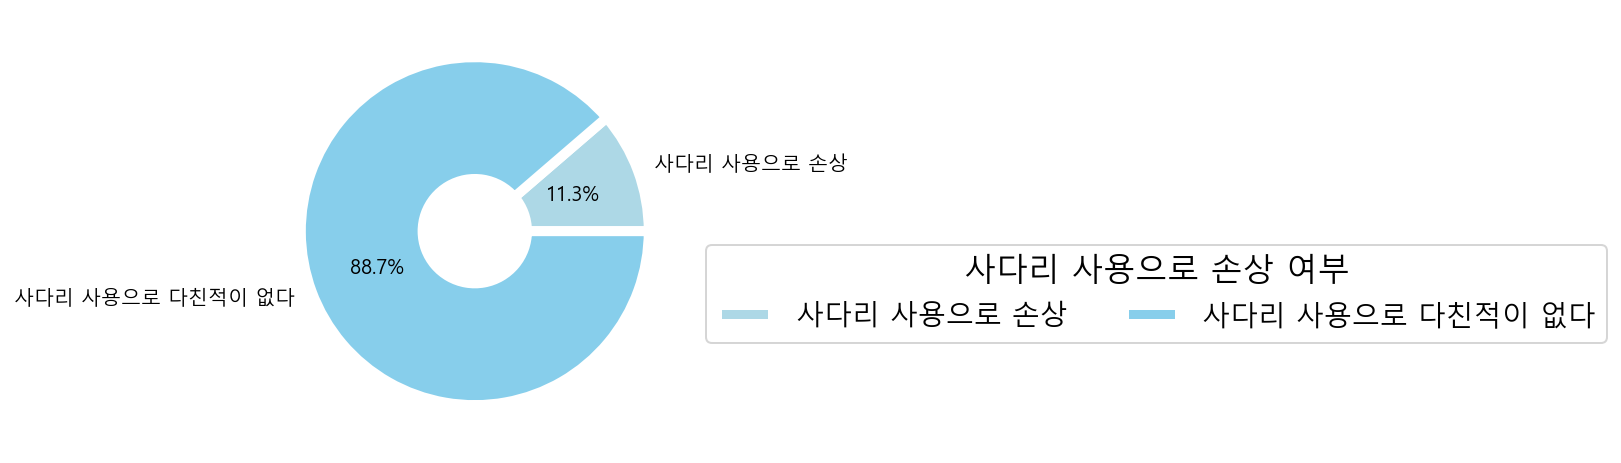

In [ ]:
yes_ladder_person=data1.loc[(data1['q26']==1)|(data1['q26']==2)|(data1['q26']==3)|(data1['q26']==4)]
yes_ladder_person_a=yes_ladder_person.loc[(yes_ladder_person['q26_1_1']==2)].count()#사다리 사용하는데 사고 남
yes_ladder_person_a_no=yes_ladder_person.loc[(yes_ladder_person['q26_1_1']==1)].count()#사다리 사용하는데 사고 안 남
yes_ladder_person_a_list=[yes_ladder_person_a.loc['시도명'],yes_ladder_person_a_no.loc['시도명']]
labels=['사다리 사용으로 손상','사다리 사용으로 다친적이 없다']
ax=plt.pie(yes_ladder_person_a_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='사다리 사용으로 손상 여부',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.0,0.5),
            title_fontsize=16)

위 결과는 사다리를 이용하여 손상을 입은 농민비율이다.
사다리의 1,2층을 사용하면 중심 잡기가 힘들어 추락하는 사고가 발생한다.

과연 사다리를 사용하는 농민들 중 얼마나 사다리 1,2층을 이용할까?

### 손상자 중 사다리를 올바르게 사용하나?

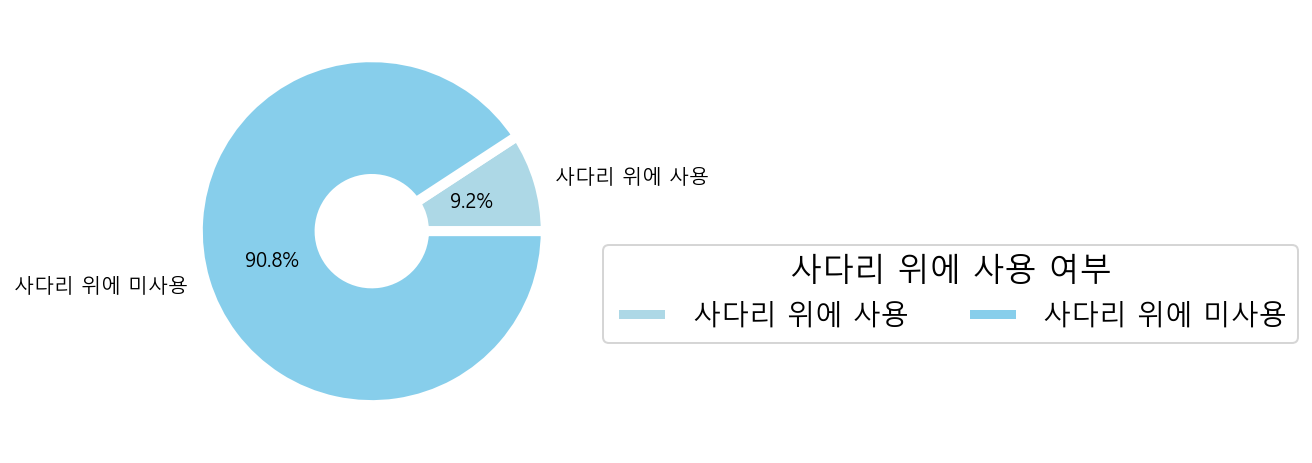

In [ ]:
#사다리 손상인데 위에 사용하는 사람
yes_ladder_person=data1.loc[(data1['q26']==1)|(data1['q26']==2)|(data1['q26']==3)|(data1['q26']==4)]
yes_ladder_person_a=yes_ladder_person.loc[(yes_ladder_person['q26_1_1']==2)]
ladder_q27_2=yes_ladder_person.loc[(yes_ladder_person['q27_2']==1)|(yes_ladder_person['q27_2']==2)|(yes_ladder_person['q27_2']==3)].count()
ladder_q27_2_no=yes_ladder_person.loc[(yes_ladder_person['q27_2']==4)|(yes_ladder_person['q27_2']==5)].count()

ladder_q27_2_list=[ladder_q27_2.loc['시도명'],ladder_q27_2_no.loc['시도명']]
labels=['사다리 위에 사용','사다리 위에 미사용']
ax=plt.pie(ladder_q27_2_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='사다리 위에 사용 여부',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.0,0.5),
            title_fontsize=16)

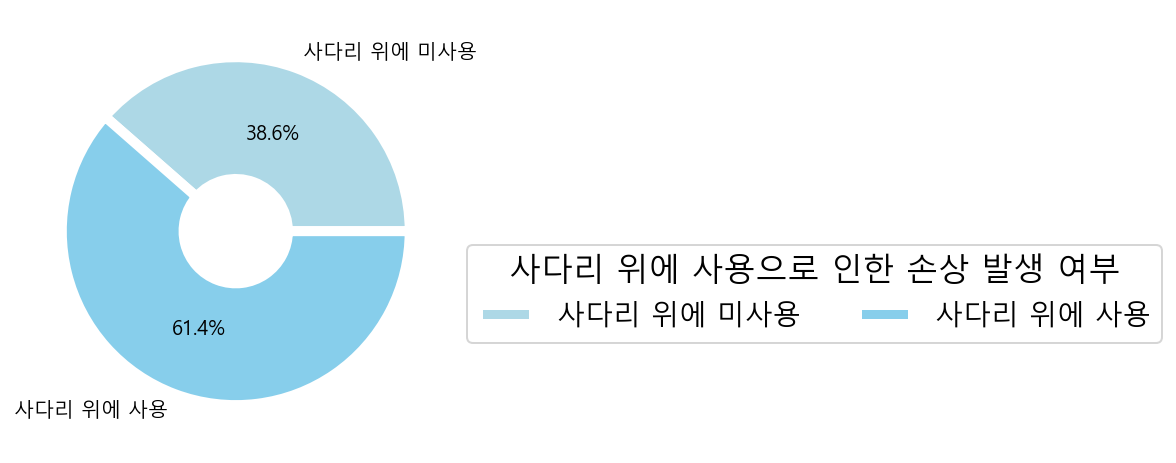

In [ ]:
#사다리 위에 사용안하는데 다침->정부가 해결해야 함
l1=data1.loc[(data1['q26']==1)|(data1['q26']==2)|(data1['q26']==3)|(data1['q26']==4)]
no=l1.loc[l1['q27_2']==4] #위에 사용 no
no_l_a=no.loc[no['q26_1_1']==2].count() #근데 다쳤어
yes=l1.loc[(l1['q27_2']==1)|(l1['q27_2']==2)|(l1['q27_2']==3)] #위에 사용 yes
yes_l_a=yes.loc[yes['q26_1_1']==2].count()

ladder_q27_2_list=[no_l_a.loc['시도명'],yes_l_a.loc['시도명']]
labels=['사다리 위에 미사용','사다리 위에 사용']
ax=plt.pie(ladder_q27_2_list, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=['lightblue','skyblue'])
_=plt.legend(title='사다리 위에 사용으로 인한 손상 발생 여부',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.0,0.5),
            title_fontsize=16)

->그래프의 결과는 사다리를 사용하다 손상당한 농민들 중 38.6%는 잘못된 사다리로 사용으로 손상을 당했다. 하지만 나머지 61.4%는 올바르게 사다리를 사용했지만 손상을 당한 농민들이다. 

그래서 정부는 올바르게 사다리를 사용했지만 손상당한 농민들을 위해 
안전한 사다리를 농민들이 사용할 수 있도록 더 노력을 해야한다고 생각한다.

또한 농민들을 자신의 안전을 위해 사다리 1,2층 사용을 자제하고 사용해야 할 경우는 2인 1조로 안전한 사다리를 사용했으면 좋겠다.

# 농업인의 교통사고와 신호등

In [ ]:
d2=data1.groupby(['시도명','시군구명'])['q25_1'].sum()
d2=pd.DataFrame(d2)
d2

q25_1
시도명  시군구명       
강원도  강릉시     299
     삼척시     443
     양구군     387
     원주시     953
     정선군     341
...          ...
충청북도 제천시     570
     진천군     239
     청원구      92
     충주시     544
     흥덕구     137

[91 rows x 1 columns]

In [ ]:
#강원도
la=[]
l1=['강릉시','삼척시','양구군','원주시','정선군','춘천시','홍천군','횡성군']
for i in l1:
    a=0
    kang=data1.loc[data1['시도명']=='강원도']
    kang1=kang.loc[kang['시군구명']==i]
    kang1_t=kang1['q25_1']
    for i in range(len(kang1_t)):
        if kang1_t.iloc[i]==3 or kang1_t.iloc[i]==4 :
            a+=1
    la.append(a)
#la

#경기도
lb=[]
l1=['가평군','김포시','안성시','양평군','여주시','연천군','용인시','이천시','파주시','평택시','포천시','화성시']
for i in l1:
    b=0
    kyeong=data1.loc[data1['시도명']=='경기도']
    kyeong=kyeong.loc[kyeong['시군구명']==i]
    kyeong_t=kyeong['q25_1']
    for i in range(len(kyeong_t)):
        if kyeong_t.iloc[i]==3 or kyeong_t.iloc[i]==4 :
            b+=1
    lb.append(b)
#lb

#경상남도
lc=[]
l1=['거제시','거창군','고성군','김해시','남해군','밀양시','사천시','산청군','의령군','진주시','창원시','하동군','함안군']
for i in l1:
    c=0
    gn=data1.loc[data1['시도명']=='경상남도']
    gn=gn.loc[gn['시군구명']==i]
    gn_t=gn['q25_1']
    for i in range(len(gn_t)):
        if gn_t.iloc[i]==3 or gn_t.iloc[i]==4 :
            c+=1
    lc.append(c)        
#lc

#경상북도
ld=[]
l1=['경산시','경주시','구미시','김천시','문경시','상주시','안동시','영양군','영천시','예천군','의성군','청송군','포항시']
for i in l1:
    d=0
    gb=data1.loc[data1['시도명']=='경상북도']
    gb=gb.loc[gb['시군구명']==i]
    gb_t=gb['q25_1']
    for i in range(len(gb_t)):
        if gb_t.iloc[i]==3 or gb_t.iloc[i]==4 :
            d+=1
    ld.append(d)
#ld

#인천광역시
le=[]
l1=['강화군']
for i in l1:
    e=0
    ic=data1.loc[data1['시도명']=='인천광역시']
    ic=ic.loc[ic['시군구명']==i]
    ic_t=ic['q25_1']
    for i in range(len(ic_t)):
        if ic_t.iloc[i]==3 or ic_t.iloc[i]==4 :
            e+=1
    le.append(e)
#le

#전라남도
lf=[]
l1=['강진군','고흥군','구례군','광양시','나주시','담양군','무안군','순천시','장흥군','해남군','화순군']
for i in l1:
    f=0
    jn=data1.loc[data1['시도명']=='전라남도']
    jn=jn.loc[jn['시군구명']==i]
    jn_t=jn['q25_1']
    for i in range(len(jn_t)):
        if jn_t.iloc[i]==3 or jn_t.iloc[i]==4 :
            f+=1
    lf.append(f)
#lf

#전라북도
lg=[]
l1=['고창군','군산시','김제시','남원시','익산시','완주군','정읍시','진안군']
for i in l1:
    g=0
    jb=data1.loc[data1['시도명']=='전라북도']
    jb=jb.loc[jb['시군구명']==i]
    jb_t=jb['q25_1']
    for i in range(len(jb_t)):
        if jb_t.iloc[i]==3 or jb_t.iloc[i]==4 :
            g+=1
    lg.append(g)
#lg

#제주특별자치도
lh=[]
l1=['서귀포시','제주시']
for i in l1:
    h=0
    jeju=data1.loc[data1['시도명']=='제주특별자치도']
    jeju=jeju.loc[jeju['시군구명']==i]
    jeju_t=jeju['q25_1']
    for i in range(len(jeju_t)):
        if jeju_t.iloc[i]==3 or jeju_t.iloc[i]==4 :
            h+=1
    lh.append(h)
#lh

#충청남도
lj=[]
l1=['금산군','공주시','당진시','보령시','부여군','서천군','아산시','예산군','청양군','태안군']
for i in l1:
    j=0
    cn=data1.loc[data1['시도명']=='충청남도']
    cn=cn.loc[cn['시군구명']==i]
    cn_t=cn['q25_1']
    for i in range(len(cn_t)):
        if cn_t.iloc[i]==3 or cn_t.iloc[i]==4 :
            j+=1
    lj.append(j)
#lj

#충청북도
lk=[]
l1=['괴산군','단양군','보은군','상당구','서원구','영동군','옥천군','음성군','제천시','진천군','청원구','충주시','흥덕구']
for i in l1:
    k=0
    cb=data1.loc[data1['시도명']=='충청북도']
    cb=cb.loc[cb['시군구명']==i]
    cb_t=cb['q25_1']
    for i in range(len(cb_t)):
        if cb_t.iloc[i]==3 or cb_t.iloc[i]==4 :
            k+=1
    lk.append(k)
#lk
la, lb, lc, ld, le, lf, lg, lh, lj, lk

([66, 104, 58, 119, 76, 51, 57, 53],
 [37, 43, 56, 58, 12, 22, 3, 11, 44, 31, 36, 31],
 [72, 66, 99, 25, 39, 30, 53, 24, 35, 70, 20, 47, 34],
 [34, 134, 65, 91, 98, 56, 78, 92, 129, 82, 103, 60, 100],
 [29],
 [58, 75, 29, 81, 110, 34, 47, 113, 52, 32, 19],
 [57, 80, 60, 25, 216, 74, 75, 13],
 [59, 72],
 [55, 111, 102, 109, 80, 72, 163, 80, 72, 146],
 [50, 83, 84, 56, 22, 157, 50, 49, 93, 28, 20, 10, 27])

In [ ]:
# 추출한 모든 리스트들을 신호등이라는 데이터프레임으로 만든다
l=la+lb+lc+ld+le+lf+lg+lh+lj+lk
l=pd.DataFrame(l,columns=['신호등'])
l

,신호등
0,66
1,104
2,58
3,119
4,76
...,...
86,93
87,28
88,20
89,10


In [ ]:
# d2와 새로 만든 l 데이터프레임으로 새로운 데이터프레임인 dd를 만들었다
d2=data1.groupby(['시도명','시군구명'])['q25_1'].sum()
d2=pd.DataFrame(d2)
d3=d2.reset_index()
dd=pd.concat([d3,l], axis=1)
dd

,시도명,시군구명,q25_1,신호등
0,강원도,강릉시,299,66
1,강원도,삼척시,443,104
2,강원도,양구군,387,58
3,강원도,원주시,953,119
4,강원도,정선군,341,76
...,...,...,...,...
86,충청북도,제천시,570,93
87,충청북도,진천군,239,28
88,충청북도,청원구,92,20
89,충청북도,충주시,544,10


데이터프레임 dd를 이용하여 각 시도별,각 시군구에서 신호등이 부족하다고 답변한 비율을 pie chart로 나타낸다

,신호등
시도명,
강원도,584
경기도,384
경상남도,614
경상북도,1122
인천광역시,29
전라남도,650
전라북도,600
제주특별자치도,131
충청남도,990


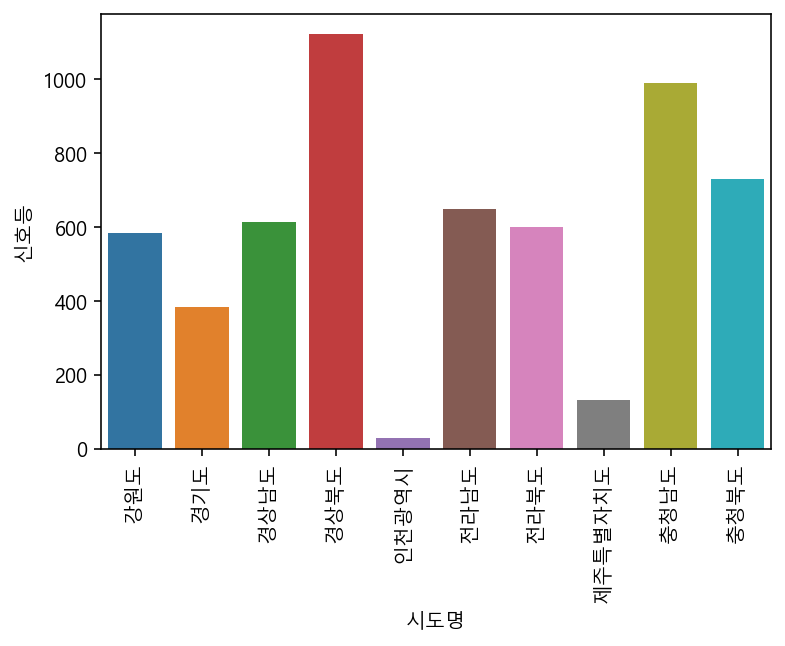

In [ ]:
x=dd.groupby(['시도명'])['신호등'].sum()
x=pd.DataFrame(x)
x
ax=sns.barplot(data=x,x=x.index, y='신호등')
_=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## 신호등이 부족하다고 답변한 비율

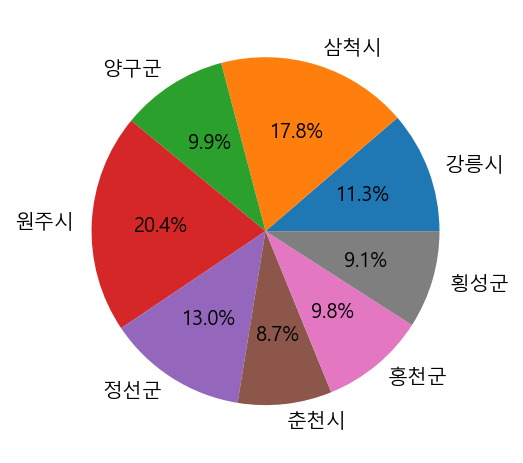

In [ ]:
# 강원도
a = dd.loc[dd['시도명']=='강원도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='강원도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

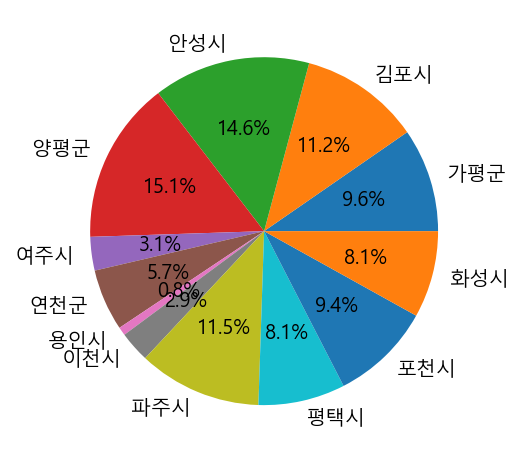

In [ ]:
# 경기도
a = dd.loc[dd['시도명']=='경기도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='경기도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

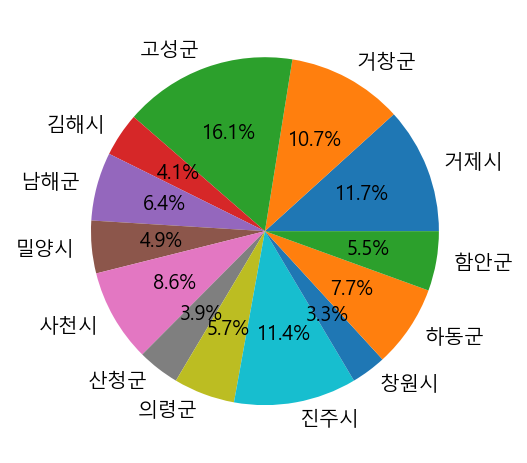

In [ ]:
# 경상남도
a = dd.loc[dd['시도명']=='경상남도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='경상남도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
    colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

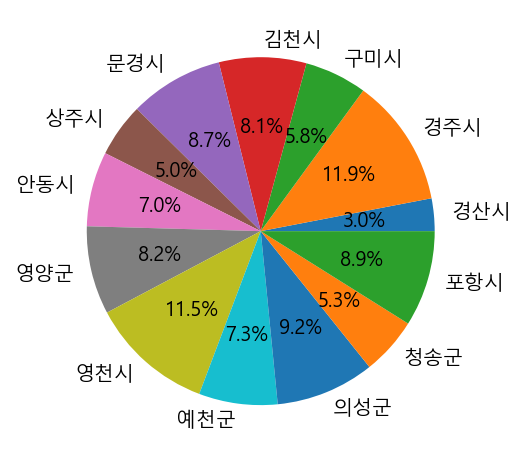

In [ ]:
# 경상북도
a = dd.loc[dd['시도명']=='경상북도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='경상북도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

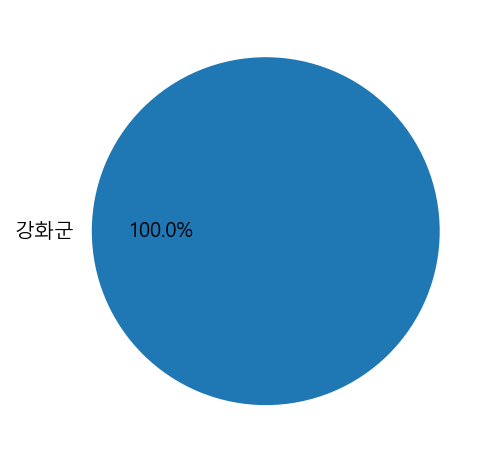

In [ ]:
# 인천광역시
a = dd.loc[dd['시도명']=='인천광역시']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='인천광역시']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

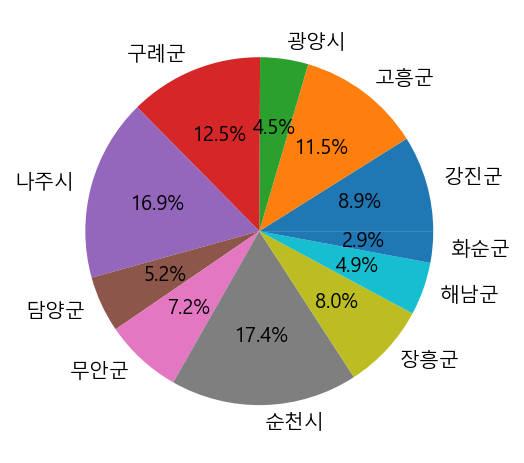

In [ ]:
# 전라남도
a = dd.loc[dd['시도명']=='전라남도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='전라남도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

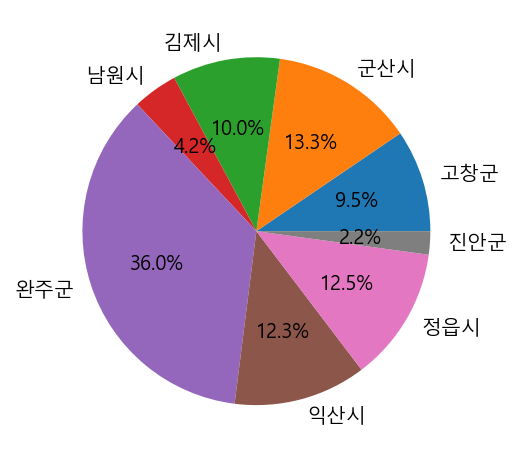

In [ ]:
# 전라북도
a = dd.loc[dd['시도명']=='전라북도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='전라북도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

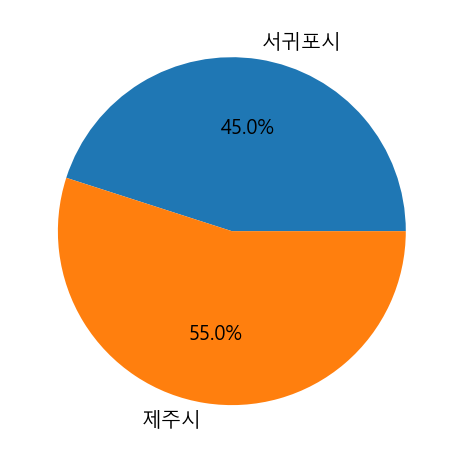

In [ ]:
# 제주특별자치도
a = dd.loc[dd['시도명']=='제주특별자치도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='제주특별자치도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

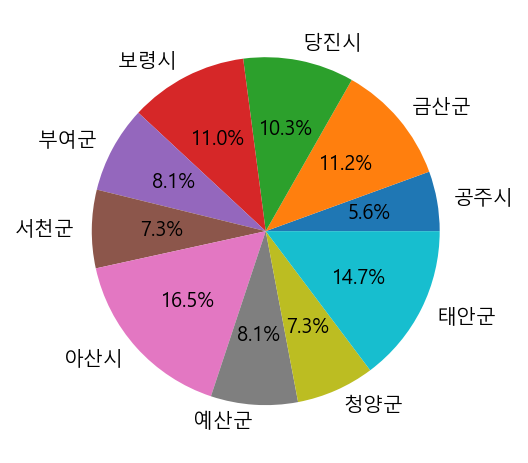

In [ ]:
# 충청남도
a = dd.loc[dd['시도명']=='충청남도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='충청남도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

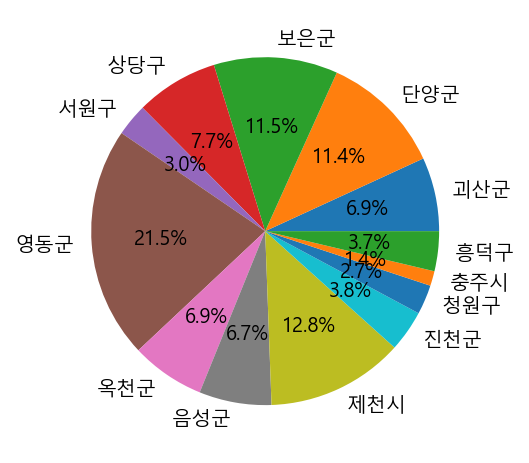

In [ ]:
# 충청북도
a = dd.loc[dd['시도명']=='충청북도']
a_list=[]
label_list=[]
a = dd.loc[dd['시도명']=='충청북도']
for i in range(len(a)):
    r=a.iloc[i]['신호등']
    a_list.append(r)
    label_list.append(a.iloc[i]['시군구명'])
_=plt.pie(a_list, labels=label_list, autopct='%.1f%%')

->다음 분석을 통해 주 이동경로에 신호등이 부족하다고 느낀 농업인의 비율은 강원도는 원주시, 경기도는 양평군, 경상남도는 고성군, 경상북도는 영천시, 인천광역시는 강화군, 전라남도는 순천시, 전라북도는 완주군, 제주특별자치도는 제주시, 충청남도는 아산시, 충청북도는 영동군이 가장 높은것을 알 수 있다. 2020년 1년간 경찰청에 집계된 농업인 교통사고는 367건, 사망자는 49명으로 치사율은 13.35%이다. 같은 기간 전체 교통사고 발생이 20만9654건, 사망자 3081명으로 치사율이 1.46%란 점을 감안할 때 농기계 사고 치사율은 무려 9.1배 높다. 농업인의 안전을 위해 신호등이 부족한 곳에 신호등이 확대되는 정책이 마련되어야한다고 생각한다.

# 장비 착용 여부

In [ ]:
# 상당히 신경씀
a1=data1['q22']==1   #data1[data1['q22']==1]
print(a1.sum())

# 약간 신경씀
a2=data1['q22']==2   #data1[data1['q22']==2]
print(a2.sum())

# 별로 신경쓰지 않음   #data1[data1['q22']==3]
a3=data1['q22']==3
print(a3.sum())

# 거의 신경쓰지 않음   #data1[data1['q22']==4]
a4=data1['q22']==4
print(a4.sum())

# 합계가 맞는지 확인
print(a1.sum()+a2.sum()+a3.sum()+a4.sum())

10264
5051
2063
392
17770


([<matplotlib.patches.Wedge at 0x1235b883a30>,
 [Text(-0.2655269394212242, 1.0674715192648456, '상당히 신경씀'),
  Text(-0.20799130711929795, -1.0801572182616779, '약간 신경씀'),
  Text(0.9635810705377325, -0.5305765924928819, '별로 신경쓰지 않음'),
  Text(1.097359495497588, -0.07617176406831587, '거의 신경쓰징 않음')],
 [Text(-0.14483287604794043, 0.5822571923262794, '57.8%'),
  Text(-0.11344980388325342, -0.5891766645063696, '28.4%'),
  Text(0.5255896748387631, -0.28940541408702647, '11.6%'),
  Text(0.5985597248168661, -0.0415482349463541, '2.2%')])

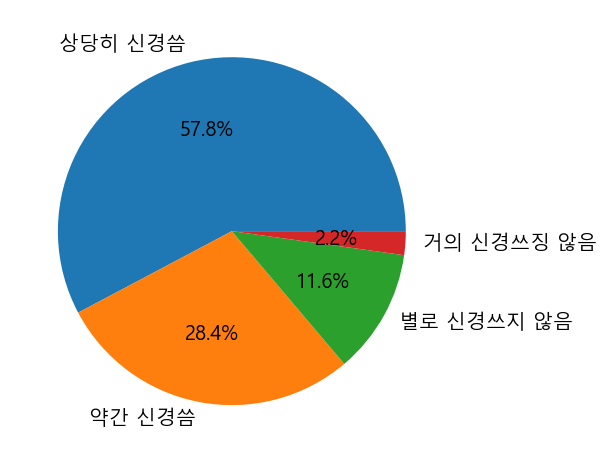

In [ ]:
ratio = [a1.sum(),a2.sum(),a3.sum(),a4.sum()]
labels = ['상당히 신경씀', '약간 신경씀', '별로 신경쓰지 않음', '거의 신경쓰징 않음']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

## 논농사

596
483
1445
6558
93


([<matplotlib.patches.Wedge at 0x1235b878ca0>,
 [Text(1.076705513497049, 0.225178234305752, '항상'),
  Text(0.9204666746222966, 0.6022799190656878, '자주'),
  Text(0.35068453427782204, 1.0426026843521685, '가끔'),
  Text(-0.7067101032860181, -0.8429477029528378, '없다')],
 [Text(0.5872939164529357, 0.12282449143950108, '6.6%'),
  Text(0.5020727316121617, 0.32851631949037513, '5.3%'),
  Text(0.19128247324244835, 0.5686923732830009, '15.9%'),
  Text(-0.38547823815600984, -0.4597896561560933, '72.2%')])

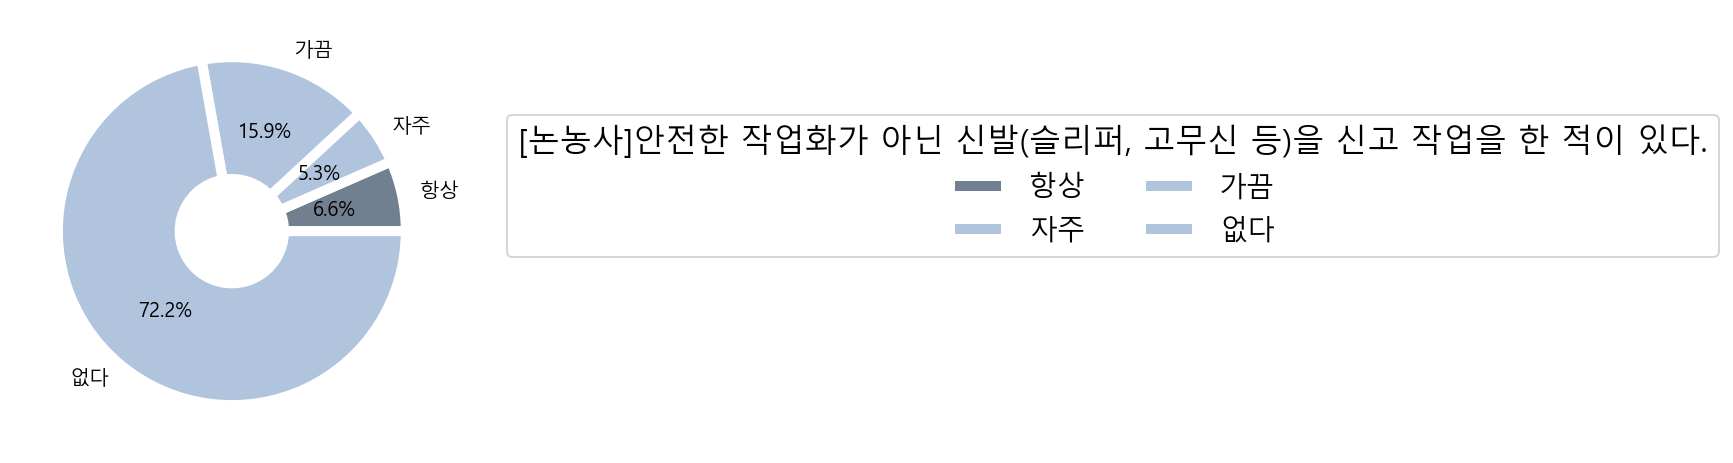

In [ ]:
r1=data1[data1['q2_1_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1


# 항상
rs1=r1['q27_1']==1
print(rs1.sum())

# 자주
rs2=r1['q27_1']==2
print(rs2.sum())

# 가끔
rs3=r1['q27_1']==3
print(rs3.sum())

# 없다
rs4=r1['q27_1']==4
print(rs4.sum())

# 해당없음
rs5=r1['q27_1']==5
print(rs5.sum())

ratio = [rs1.sum(),rs2.sum(),rs3.sum(),rs4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[논농사]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

334
339
734
3900
3868


([<matplotlib.patches.Wedge at 0x1235bb498b0>,
 [Text(1.0785690239539452, 0.21607605273846167, '항상'),
  Text(0.9102751399531093, 0.6175752339459115, '자주'),
  Text(0.3663127080150437, 1.0372150210764812, '가끔'),
  Text(-0.7400029948482708, -0.8138768749728612, '없다')],
 [Text(0.5883103767021518, 0.11785966513006998, '6.3%'),
  Text(0.4965137127016959, 0.33685921851595174, '6.4%'),
  Text(0.19980693164456928, 0.5657536478598988, '13.8%'),
  Text(-0.4036379971899659, -0.44393284089428786, '73.5%')])

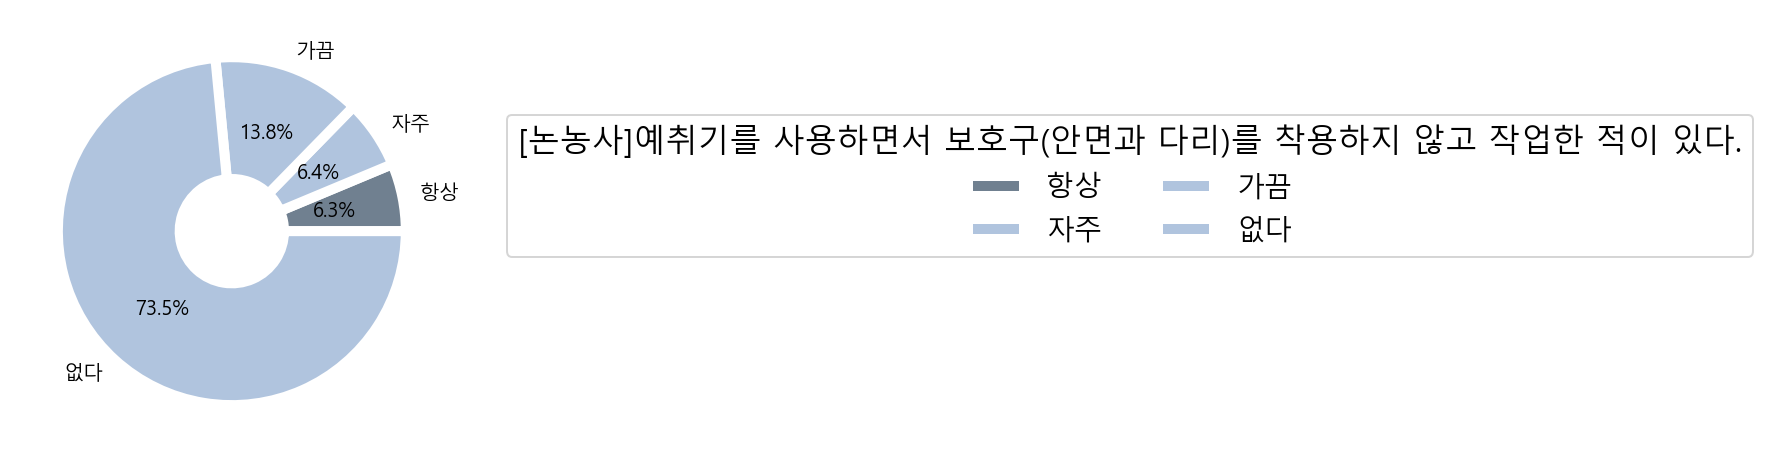

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
rh1=r1['q27_7']==1       #d1[d1['q27_7']==1]
print(rh1.sum())

# 자주
rh2=r1['q27_7']==2       #d1[d1['q27_7']==2]
print(rh2.sum())

# 가끔
rh3=r1['q27_7']==3       #d1[d1['q27_7']==3]
print(rh3.sum())

# 없다
rh4=r1['q27_7']==4       #d1[d1['q27_7']==4]
print(rh4.sum())

# 해당없음
rh5=r1['q27_7']==5       #d1[d1['q27_7']==5]
print(rh5.sum())

ratio = [rh1.sum(),rh2.sum(),rh3.sum(),rh4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[논농사]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

## 밭농사

779
810
1858
8226
99


([<matplotlib.patches.Wedge at 0x1235f323730>,
 [Text(1.075913094850491, 0.2289345153733679, '항상'),
  Text(0.8840708280108827, 0.6545370662232601, '자주'),
  Text(0.23515630192717077, 1.07457038562578, '가끔'),
  Text(-0.6596417007412998, -0.8802686105065463, '없다')],
 [Text(0.5868616881002676, 0.12487337202183701, '6.7%'),
  Text(0.4822204516422996, 0.35702021793996, '6.9%'),
  Text(0.12826707377845675, 0.5861293012504254, '15.9%'),
  Text(-0.359804564040709, -0.48014651482175247, '70.5%')])

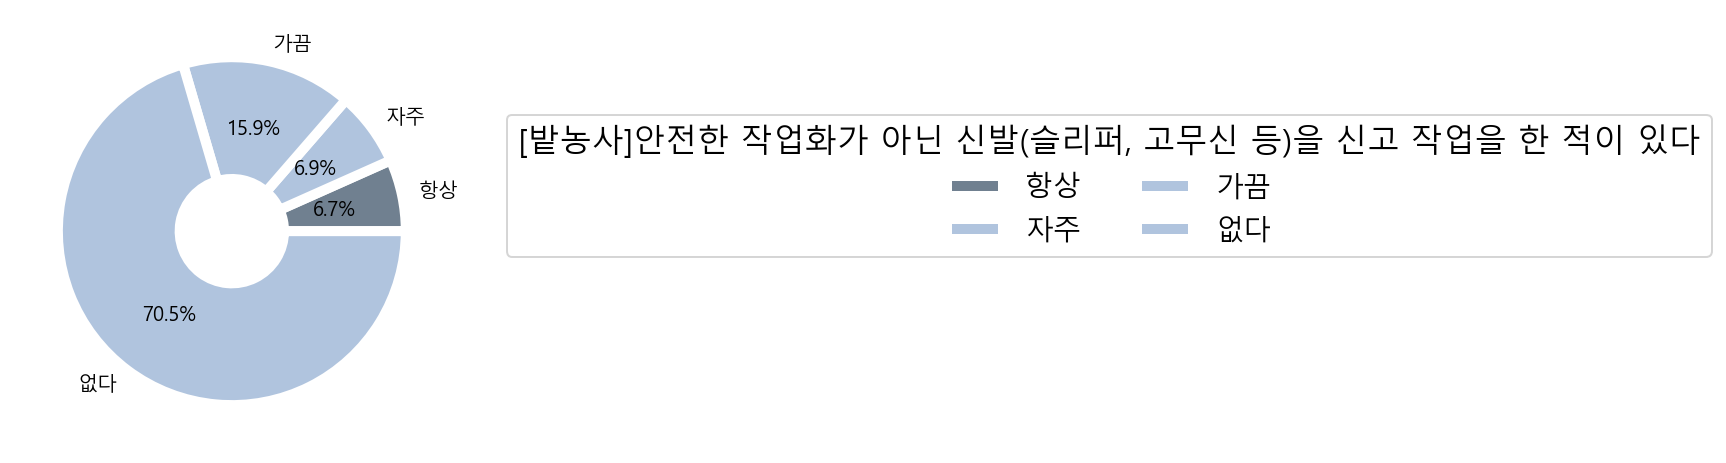

In [ ]:
f1=data1[data1['q2_2_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1

# 항상
fs1=f1['q27_1']==1
print(fs1.sum())

# 자주
fs2=f1['q27_1']==2
print(fs2.sum())

# 가끔
fs3=f1['q27_1']==3
print(fs3.sum())

# 없다
fs4=f1['q27_1']==4
print(fs4.sum())

# 해당없음
fs5=f1['q27_1']==5
print(fs5.sum())

ratio = [fs1.sum(),fs2.sum(),fs3.sum(),fs4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[밭농사]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

334
323
760
4470
5885


([<matplotlib.patches.Wedge at 0x1235bb49100>,
 [Text(1.0825732160101045, 0.19502623407516162, '항상'),
  Text(0.9497286825297233, 0.5549913779333481, '자주'),
  Text(0.49228943707611894, 0.9836925892489371, '가끔'),
  Text(-0.8002079176835069, -0.7547630677746667, '없다')],
 [Text(0.5904944814600569, 0.10637794585917905, '5.7%'),
  Text(0.5180338268343945, 0.30272256978182616, '5.5%'),
  Text(0.2685215111324285, 0.5365595941357838, '12.9%'),
  Text(-0.4364770460091855, -0.4116889460589091, '75.9%')])

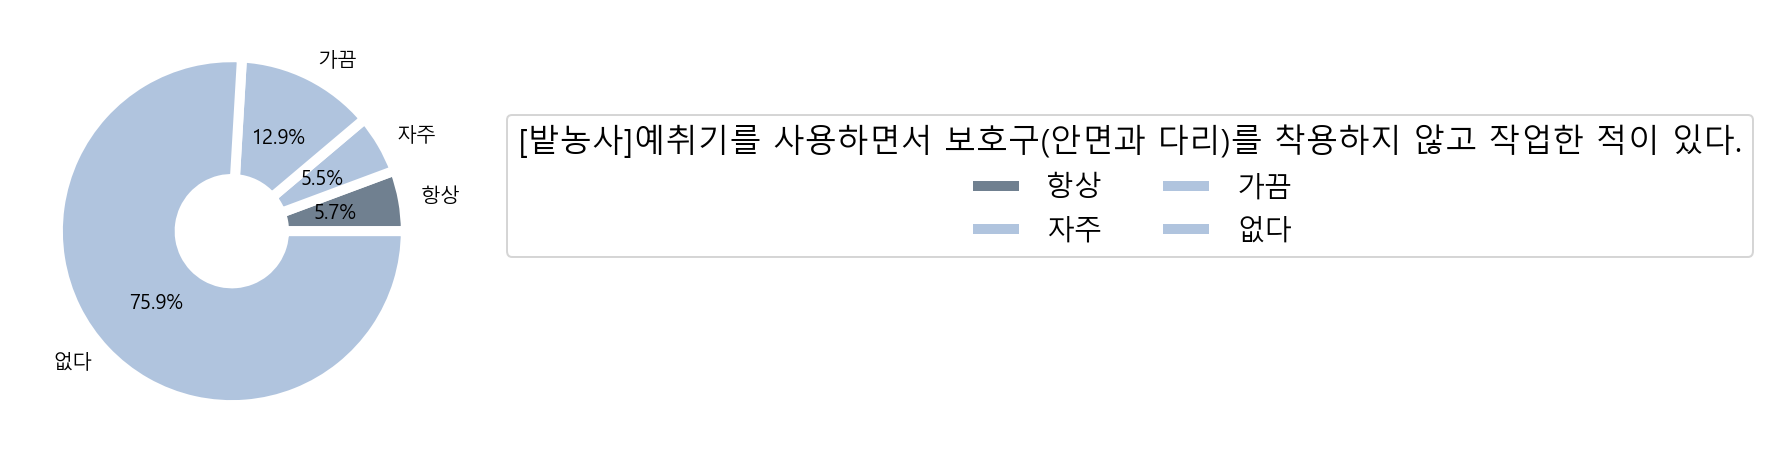

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
fh1=f1['q27_7']==1       #data1[data1['q27_7']==1]
print(fh1.sum())

# 자주
fh2=f1['q27_7']==2       #data1[data1['q27_7']==2]
print(fh2.sum())

# 가끔
fh3=f1['q27_7']==3       #data1[data1['q27_7']==3]
print(fh3.sum())

# 없다
fh4=f1['q27_7']==4       #data1[data1['q27_7']==4]
print(fh4.sum())

# 해당없음
fh5=f1['q27_7']==5       #data1[data1['q27_7']==5]
print(fh5.sum())

ratio = [fh1.sum(),fh2.sum(),fh3.sum(),fh4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[밭농사]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

## 과수원

153
88
294
1506
11


([<matplotlib.patches.Wedge at 0x1235b7a03d0>,
 [Text(1.069636547193187, 0.25666643120719396, '항상'),
  Text(0.9038370870110458, 0.6269597436386066, '자주'),
  Text(0.4042757116158296, 1.0230157129768411, '가끔'),
  Text(-0.7476282693973759, -0.8068779156711905, '없다')],
 [Text(0.5834381166508292, 0.1399998715675603, '7.5%'),
  Text(0.4930020474605704, 0.34197804198469445, '4.3%'),
  Text(0.2205140245177252, 0.5580085707146406, '14.4%'),
  Text(-0.4077972378531141, -0.44011522672974024, '73.8%')])

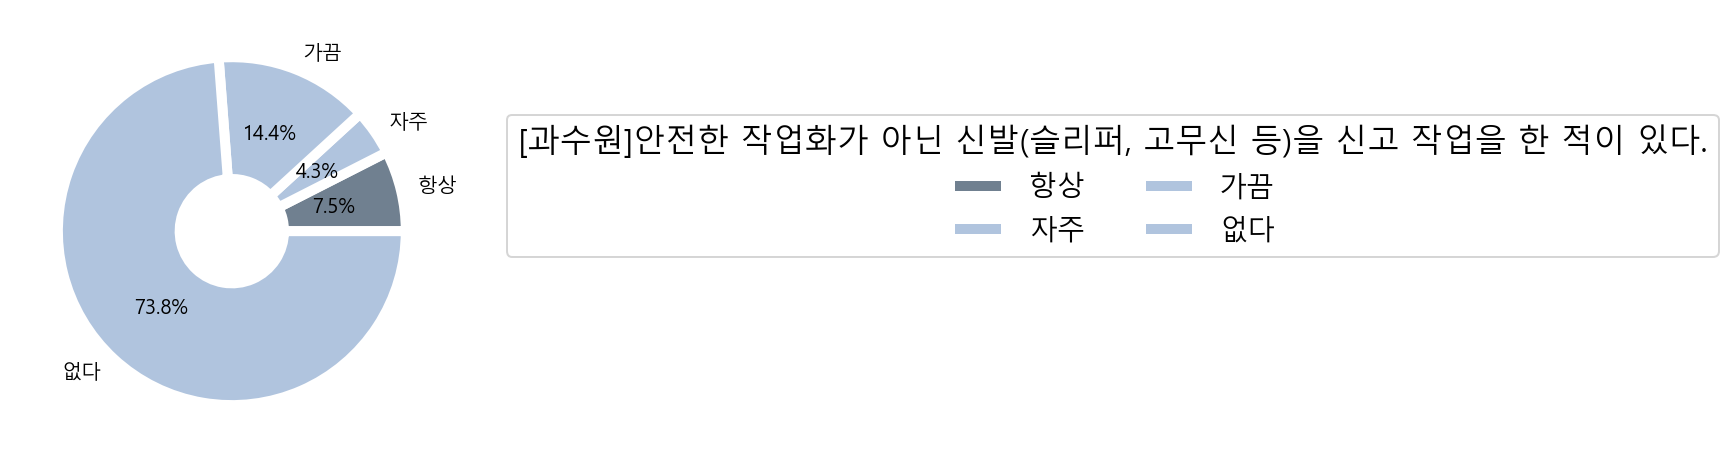

In [ ]:
o1=data1[data1['q2_3_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1

# 항상
os1=o1['q27_1']==1
print(os1.sum())

# 자주
os2=o1['q27_1']==2
print(os2.sum())

# 가끔
os3=o1['q27_1']==3
print(os3.sum())

# 없다
os4=o1['q27_1']==4
print(os4.sum())

# 해당없음
os5=o1['q27_1']==5
print(os5.sum())

ratio = [os1.sum(),os2.sum(),os3.sum(),os4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[과수원]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

62
81
137
1016
756


([<matplotlib.patches.Wedge at 0x1235bae6e80>,
 [Text(1.0876000994509232, 0.1646997986469392, '항상'),
  Text(0.9669531724711338, 0.5244059136279928, '자주'),
  Text(0.5706505864223205, 0.9404030562561256, '가끔'),
  Text(-0.8562013915419932, -0.6905933514895395, '없다')],
 [Text(0.5932364178823216, 0.08983625380742138, '4.8%'),
  Text(0.5274290031660729, 0.2860395892516324, '6.2%'),
  Text(0.3112639562303566, 0.5129471215942503, '10.6%'),
  Text(-0.46701894084108714, -0.37668728263065787, '78.4%')])

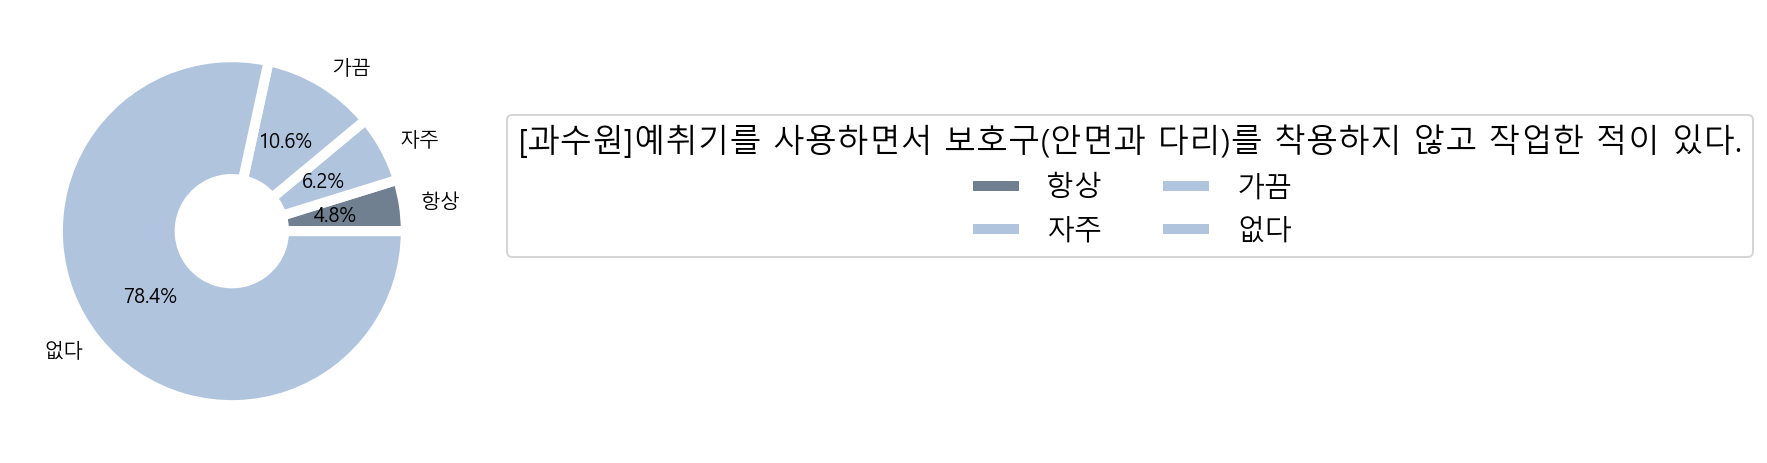

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
oh1=o1['q27_7']==1       #d1[d1['q27_7']==1]
print(oh1.sum())

# 자주
oh2=o1['q27_7']==2       #d1[d1['q27_7']==2]
print(oh2.sum())

# 가끔
oh3=o1['q27_7']==3       #d1[d1['q27_7']==3]
print(oh3.sum())

# 없다
oh4=o1['q27_7']==4       #d1[d1['q27_7']==4]
print(oh4.sum())

# 해당없음
oh5=o1['q27_7']==5       #d1[d1['q27_7']==5]
print(oh5.sum())

ratio = [oh1.sum(),oh2.sum(),oh3.sum(),oh4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[과수원]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

## 시설(하우스)

58
64
196
915
13


([<matplotlib.patches.Wedge at 0x1235ba0bfd0>,
 [Text(1.0880104816050724, 0.1619666382854768, '항상'),
  Text(0.9863274807246103, 0.48698880969427194, '자주'),
  Text(0.47817378703066277, 0.9906310258601608, '가끔'),
  Text(-0.7582567918088207, -0.7968981350685889, '없다')],
 [Text(0.5934602626936758, 0.08834543906480552, '4.7%'),
  Text(0.5379968076679692, 0.2656302598332392, '5.2%'),
  Text(0.26082206565308874, 0.5403441959237241, '15.9%'),
  Text(-0.4135946137139021, -0.43467171003741206, '74.2%')])

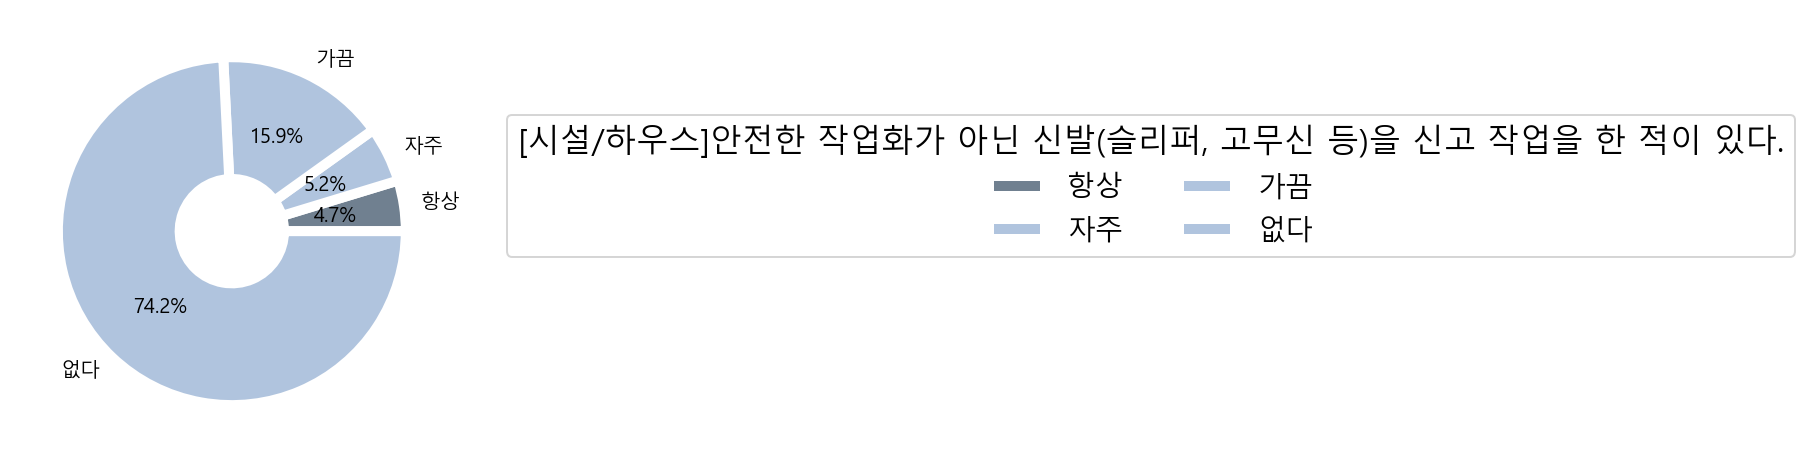

In [ ]:
house1=data1[data1['q2_4_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1

# 항상
houses1=house1['q27_1']==1
print(houses1.sum())

# 자주
houses2=house1['q27_1']==2
print(houses2.sum())

# 가끔
houses3=house1['q27_1']==3
print(houses3.sum())

# 없다
houses4=house1['q27_1']==4
print(houses4.sum())

# 해당없음
houses5=house1['q27_1']==5
print(houses5.sum())

ratio = [houses1.sum(),houses2.sum(),houses3.sum(),houses4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[시설/하우스]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

37
49
88
501
571


([<matplotlib.patches.Wedge at 0x1235ba4aaf0>,
 [Text(1.0837301016882104, 0.18849155603066503, '항상'),
  Text(0.9246232590720894, 0.5958790387175136, '자주'),
  Text(0.3882236311783534, 1.0292144636540501, '가끔'),
  Text(-0.7585814545201716, -0.7965890890905178, '없다')],
 [Text(0.5911255100117511, 0.10281357601672637, '5.5%'),
  Text(0.5043399594938669, 0.32502493020955286, '7.3%'),
  Text(0.21175834427910184, 0.5613897074476636, '13.0%'),
  Text(-0.41377170246554806, -0.4345031395039188, '74.2%')])

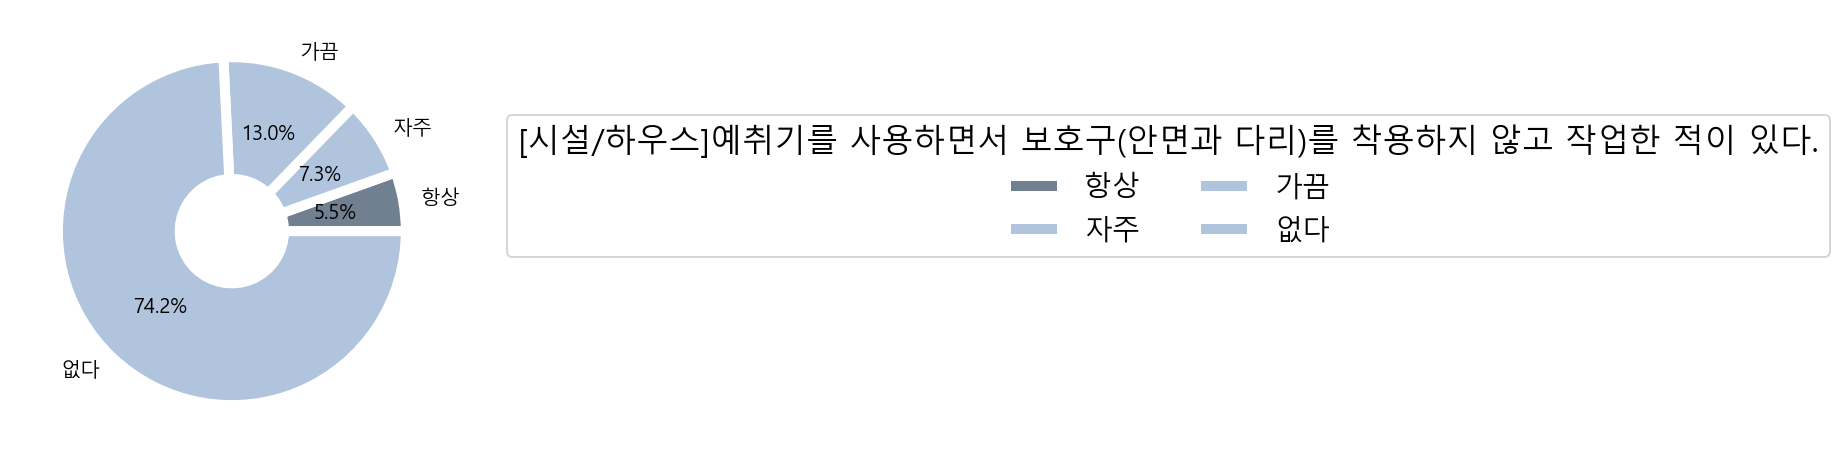

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
househ1=house1['q27_7']==1       #d1[d1['q27_7']==1]
print(househ1.sum())

# 자주
househ2=house1['q27_7']==2       #d1[d1['q27_7']==2]
print(househ2.sum())

# 가끔
househ3=house1['q27_7']==3       #d1[d1['q27_7']==3]
print(househ3.sum())

# 없다
househ4=house1['q27_7']==4       #d1[d1['q27_7']==4]
print(househ4.sum())

# 해당없음
househ5=house1['q27_7']==5       #d1[d1['q27_7']==5]
print(househ5.sum())

ratio = [househ1.sum(),househ2.sum(),househ3.sum(),househ4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[시설/하우스]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

## 축산

56
38
102
538
13


([<matplotlib.patches.Wedge at 0x1235b839100>,
 [Text(1.068553939293522, 0.2611368967041932, '항상'),
  Text(0.8809799525855943, 0.658691371692604, '자주'),
  Text(0.35599733556940305, 1.0408006038946584, '가끔'),
  Text(-0.7351102349029113, -0.818298810057174, '없다')],
 [Text(0.5828476032510118, 0.14243830729319626, '7.6%'),
  Text(0.4805345195921423, 0.35928620274142037, '5.2%'),
  Text(0.194180364856038, 0.5677094203061773, '13.9%'),
  Text(-0.4009692190379516, -0.4463448054857312, '73.3%')])

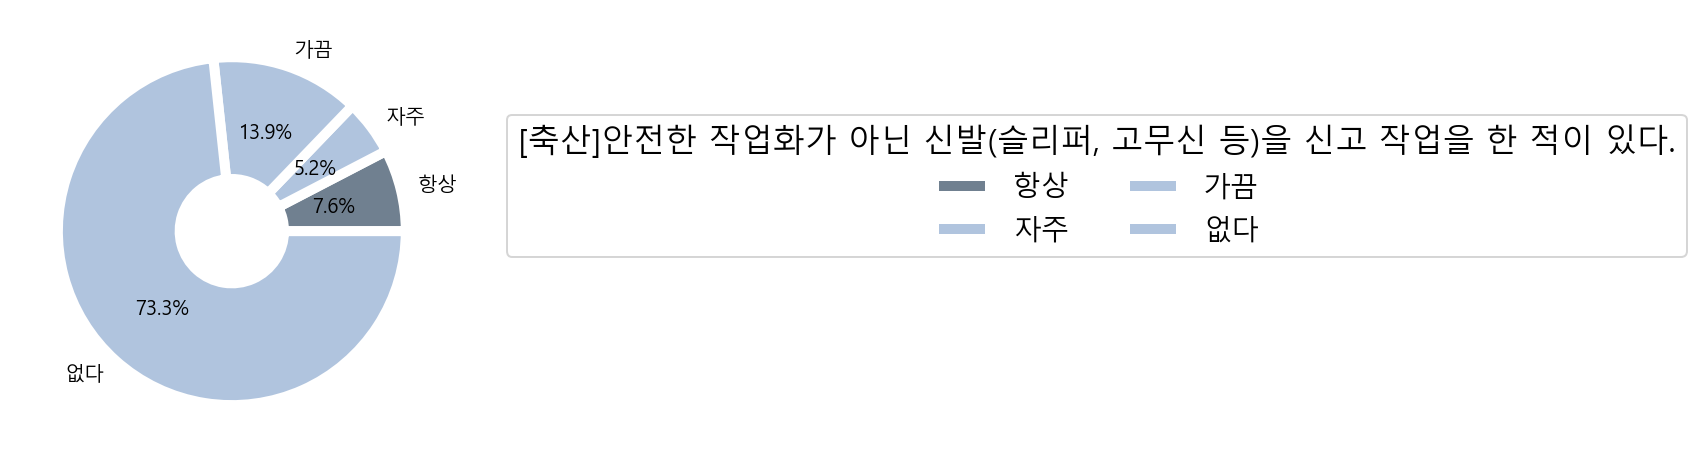

In [ ]:
animal1=data1[data1['q2_5_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1

# 항상
animals1=animal1['q27_1']==1
print(animals1.sum())

# 자주
animals2=animal1['q27_1']==2
print(animals2.sum())

# 가끔
animals3=animal1['q27_1']==3
print(animals3.sum())

# 없다
animals4=animal1['q27_1']==4
print(animals4.sum())

# 해당없음
animals5=animal1['q27_1']==5
print(animals5.sum())

ratio = [animals1.sum(),animals2.sum(),animals3.sum(),animals4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[축산]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

34
32
75
333
273


([<matplotlib.patches.Wedge at 0x1235f3fc8b0>,
 [Text(1.0721884632957162, 0.24578832188607108, '항상'),
  Text(0.8671109869781541, 0.6768445436448252, '자주'),
  Text(0.21728016437227712, 1.0783270979486494, '가끔'),
  Text(-0.6536211874424712, -0.8847481807420087, '없다')],
 [Text(0.5848300708885724, 0.13406635739240239, '7.2%'),
  Text(0.4729696292608113, 0.36918793289717733, '6.8%'),
  Text(0.11851645329396933, 0.5881784170628996, '15.8%'),
  Text(-0.35652064769589337, -0.4825899167683683, '70.3%')])

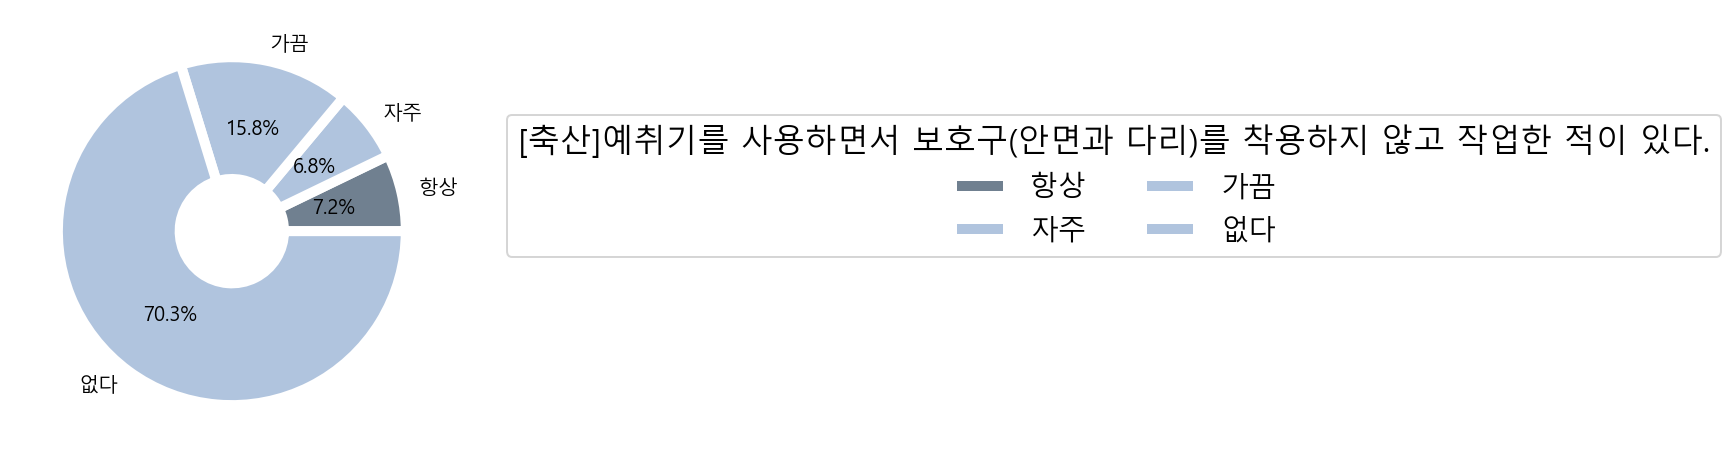

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
animalh1=animal1['q27_7']==1       #d1[d1['q27_7']==1]
print(animalh1.sum())

# 자주
animalh2=animal1['q27_7']==2       #d1[d1['q27_7']==2]
print(animalh2.sum())

# 가끔
animalh3=animal1['q27_7']==3       #d1[d1['q27_7']==3]
print(animalh3.sum())

# 없다
animalh4=animal1['q27_7']==4       #d1[d1['q27_7']==4]
print(animalh4.sum())

# 해당없음
animalh5=animal1['q27_7']==5       #d1[d1['q27_7']==5]
print(animalh5.sum())

ratio = [animalh1.sum(),animalh2.sum(),animalh3.sum(),animalh4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[축산]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

## 기타

1
2
3
41
0


([<matplotlib.patches.Wedge at 0x1235b955b20>,
 [Text(1.0975435666409765, 0.07347189479661434, '항상'),
  Text(1.0609160950202328, 0.2906149330764345, '자주'),
  Text(0.9068857245918626, 0.6225417917951315, '가끔'),
  Text(-1.0127148606945555, -0.4294282372276039, '없다')],
 [Text(0.5986601272587143, 0.04007557897997146, '2.1%'),
  Text(0.5786815063746724, 0.1585172362235097, '4.3%'),
  Text(0.4946649406864704, 0.3395682500700717, '6.4%'),
  Text(-0.552389924015212, -0.23423358394232938, '87.2%')])

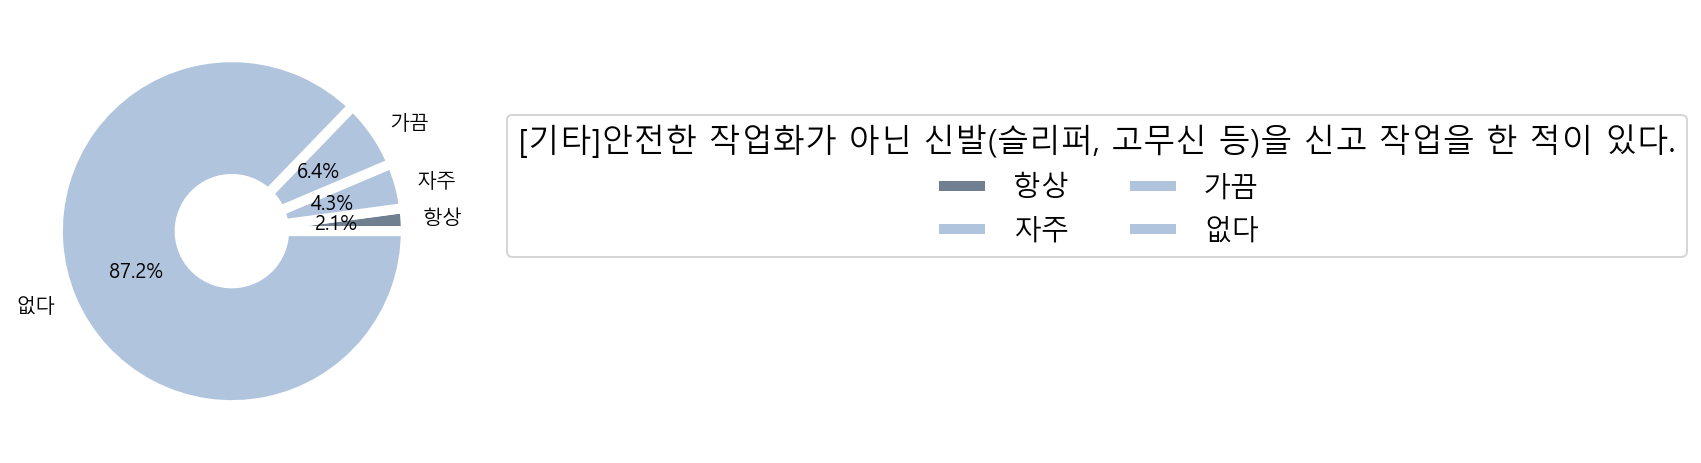

In [ ]:
other1=data1[data1['q2_6_1']==1]
#1) 안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다. q27_1

# 항상
others1=other1['q27_1']==1
print(others1.sum())

# 자주
others2=other1['q27_1']==2
print(others2.sum())

# 가끔
others3=other1['q27_1']==3
print(others3.sum())

# 없다
others4=other1['q27_1']==4
print(others4.sum())

# 해당없음
others5=other1['q27_1']==5
print(others5.sum())

ratio = [others1.sum(),others2.sum(),others3.sum(),others4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[기타]안전한 작업화가 아닌 신발(슬리퍼, 고무신 등)을 신고 작업을 한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

0
4
7
21
15


([<matplotlib.patches.Wedge at 0x1235f35b910>,
 [Text(1.1, 0.0, '항상'),
  Text(1.0162674857624154, 0.4209517756015988, '자주'),
  Text(0.10781885436251686, 1.0947031993394165, '가끔'),
  Text(-0.5185364105085977, -0.9701133907831905, '없다')],
 [Text(0.6, 0.0, '0.0%'),
  Text(0.5543277195067721, 0.22961005941905385, '12.5%'),
  Text(0.05881028419773646, 0.597110836003318, '21.9%'),
  Text(-0.2828380420955987, -0.5291527586090129, '65.6%')])

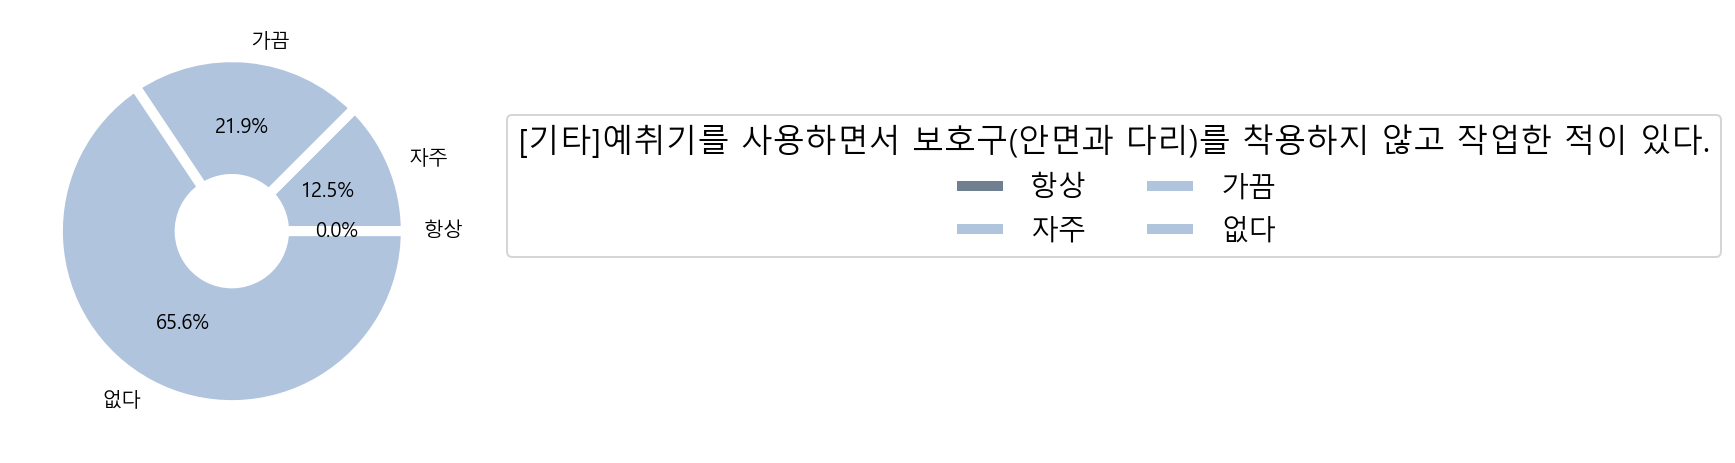

In [ ]:
#7) 예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다. q27_7

# 항상
otherh1=other1['q27_7']==1       #d1[d1['q27_7']==1]
print(otherh1.sum())

# 자주
otherh2=other1['q27_7']==2       #d1[d1['q27_7']==2]
print(otherh2.sum())

# 가끔
otherh3=other1['q27_7']==3       #d1[d1['q27_7']==3]
print(otherh3.sum())

# 없다
otherh4=other1['q27_7']==4       #d1[d1['q27_7']==4]
print(otherh4.sum())

# 해당없음
otherh5=other1['q27_7']==5       #d1[d1['q27_7']==5]
print(otherh5.sum())

ratio = [otherh1.sum(),otherh2.sum(),otherh3.sum(),otherh4.sum()]
labels = ['항상', '자주', '가끔', '없다']
colors = ['slategrey','lightsteelblue','lightsteelblue','lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops)
_=plt.legend(title='[기타]예취기를 사용하면서 보호구(안면과 다리)를 착용하지 않고 작업한 적이 있다.',
            loc='upper left',
            ncol=2,
            fontsize=14,
            bbox_to_anchor=(1.1,0.8),
            title_fontsize=16)
plt.show()

전체적인 비율만 보았을 때는 아주 극소수처럼 보이지만 실제 수를 확인해보면 결코 적은 수가 아님을 알 수 있다. 논농사의 경우 작업화를 신지 않음에 해당되는 사람 596명, 밭농사 779명, 과수원 153명, 시설(하우스) 53명, 축산업 56명, 기타 1명임을 알 수 있다. 또한, 보호구를 착용하지 안는 사람은 논농사 334명, 밭농사 334명, 과수원 62명, 시설(하우스) 37명, 축산업 34명, 기타 0명임을 알 수 있다. 

보호장구를 착용함으로써 일어날 사고에 대해 손상률을 줄일 수 있다. 안전 장비를 착용하는 것은 선택이 아니라 필수임을 농민들께서는 항상 인지하길 바라는 마음이다.

# 비료 무게에 대한 고찰

## 비료에 대한 농민들 생각

농자재(비료 등)의 무게가 대부분 20kg입니다. 기존20kg 외에 추가로 작업 부담을 줄이기 위해 10kg 단위로도 생산하시는 것에 동의하십니까?

In [ ]:
# 매우 동의한다
a1=data1['q28']==1 
print(a1.sum())

# 동의한다
a2=data1['q28']==2   
print(a2.sum())

# 동의하지 않는다  
a3=data1['q28']==3
print(a3.sum())

# 절대 동의하지 않는다   
a4=data1['q28']==4
print(a4.sum())

# 합계가 맞는지 확인
print(a1.sum()+a2.sum()+a3.sum()+a4.sum())

6705
5389
4225
1451
17770


([<matplotlib.patches.Wedge at 0x1235f37ea60>,
 [Text(0.4135293322297897, 1.0193103018147047, '매우 동의한다'),
  Text(-1.081848167548756, -0.19900890023162057, '동의한다'),
  Text(0.3364027531190563, -1.0472980414829005, '동의하지 않는다'),
  Text(1.0640052453295743, -0.2790928840209879, '절대 동의하지 않는다')],
 [Text(0.22556145394352164, 0.5559874373534752, '37.7%'),
  Text(-0.5900990004811395, -0.10855030921724758, '30.3%'),
  Text(0.18349241079221254, -0.5712534771724912, '23.8%'),
  Text(0.580366497452495, -0.1522324821932661, '8.2%')])

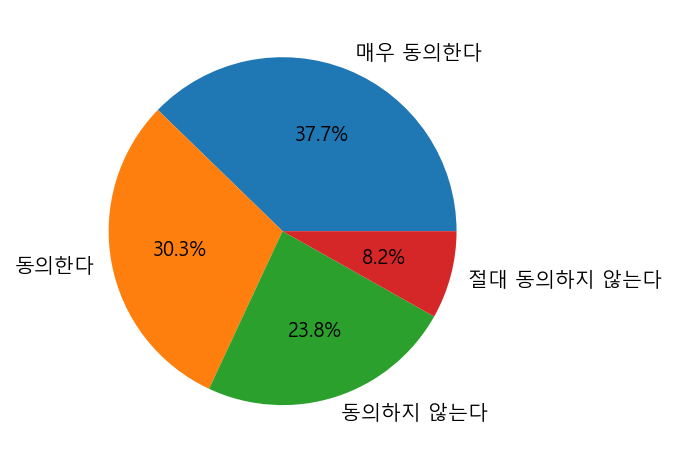

In [ ]:
ratio = [a1.sum(),a2.sum(),a3.sum(),a4.sum()]
labels = ['매우 동의한다', '동의한다', '동의하지 않는다', '절대 동의하지 않는다']

plt.pie(ratio, labels=labels, autopct='%.1f%%',)
plt.show()

## 비료 무게로 손상이 발생했는가?

16716
1020


([<matplotlib.patches.Wedge at 0x1235f4b70a0>,
 [Text(-1.0820951972612767, 0.19766128620465612, '없다'),
  Text(1.0820952042011704, -0.19766124821225747, '있다')],
 [Text(-0.5902337439606963, 0.10781524702072151, '94.2%'),
  Text(0.5902337477460928, -0.10781522629759498, '5.8%')])

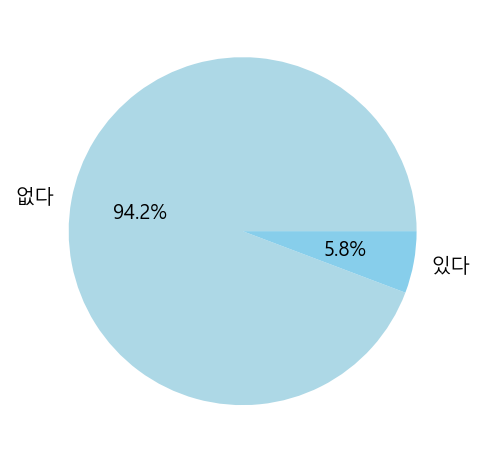

In [ ]:
c1=data1['q28_1_1']==1
print(c1.sum())
c2=data1['q28_1_1']==2
print(c2.sum())

ratio = [c1.sum(),c2.sum()]
labels = ['없다', '있다']

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=['lightblue','skyblue'])
plt.show()

## 손상 발생 횟수

id
55        3
90        1
118       4
124       3
137       5
         ..
17683     3
17694    10
17722     1
17723     1
17769     5
Name: q28_1_2, Length: 1020, dtype: int32

[(1, 339),
 (2, 270),
 (3, 184),
 (5, 82),
 (4, 54),
 (10, 47),
 (6, 15),
 (7, 9),
 (20, 7),
 (8, 7),
 (9, 3),
 (40, 1),
 (15, 1),
 (11, 1)]

<BarContainer object of 14 artists>

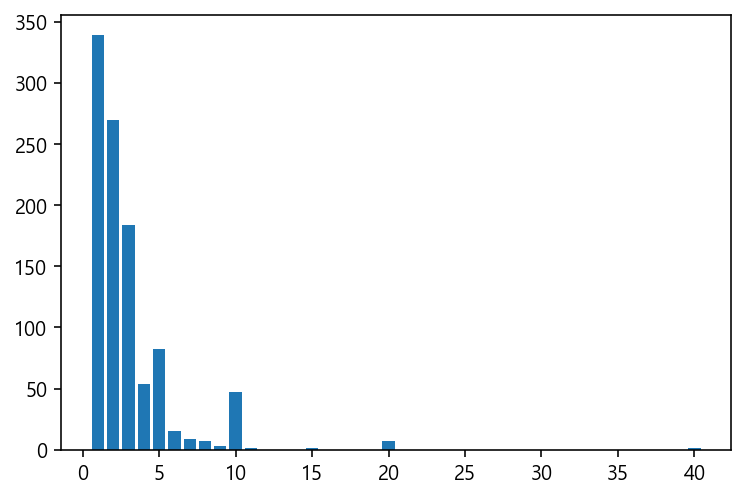

In [ ]:
d1=data1['q28_1_2']
d2=d1.dropna(axis=0)#열별로 결측값 제거
d3=d2.astype(int)#object정수로 변환
d3
d4=[]

from collections import Counter

for i in d3:
    d4.append(i)
    cnt=Counter(d4)
cnt.most_common()

plt.bar(cnt.keys(), cnt.values())
plt.show()

In [ ]:
print(d3.count())#한번이라도 다친 사람의 수


1020


In [ ]:
max(d3.values) #다친 횟수가 제일 많은 사람의 횟수

40

# 분석 결과

 분석 결과 농기계를 올바르게 사용하지 않은 농업인의 손상률이 그렇지 않은 손상률보다 높았고, 주 이동경로에 교통장비가 가장 많이 부족하다고 답변한 지역은 경상북도였으며, 분석상으로 문제가 없었던 비료 무게는 많은 농업인들이 불편함을 호소하고 있다는것을 알 수 있었다. 농업인들의 안전과 불편함 해소를 위하여 농업인의 손상률과 치사율을 감소시키는데 도움이 되는 신호등과 같은 교통장치의 확대가 필요하고, 비료의 경우 무게 뿐만아니라 값과 무게 모두를 잡아주는 트랜드 맞는 상품들에 다양성을 농민들에게 알려줘야 할 필요성이 있다고 느꼈다. 비료의 값과 무게에 대해 어쩔 수 없이 대량의 비료를 써야할 때 정부나 지역별로 기계에 대한 대여권을 주는 것이 농업인에게 많은 도움이 될 것같다.
 
 2021 농업인 손상 조사를 분석해보며 조사해본 결과, 농업 중 손상 비율이 무시할 수 없는 수준임을 보이고 있음을 알 수 있다. 농민들의 생명성을 보장받고 보다 안전한 삶을 누릴 수 있도록 정부 역시 농기계에 대한 발전과,안전장치 개발,신호등 설치,비료와 같은 필수 요소에 대한 가격 협상 등 정부차원에서의 노력이 필요하다고 생각하고 농업인들도 자신들의 안전과 사고가 발생하는것을 최소화하기 위해서는 각자 안전 수칙을 필수적으로 숙지하여 너무 안일하게 생각하지 않고 나와는 먼 일이라고 생각하는 자세를 가지지않아야 한다고 말하며 분석을 마친다.